# IPL's Top Batsmen: 
## **Cluster Analysis of Player Performance using Ball-by-Ball Dataset**

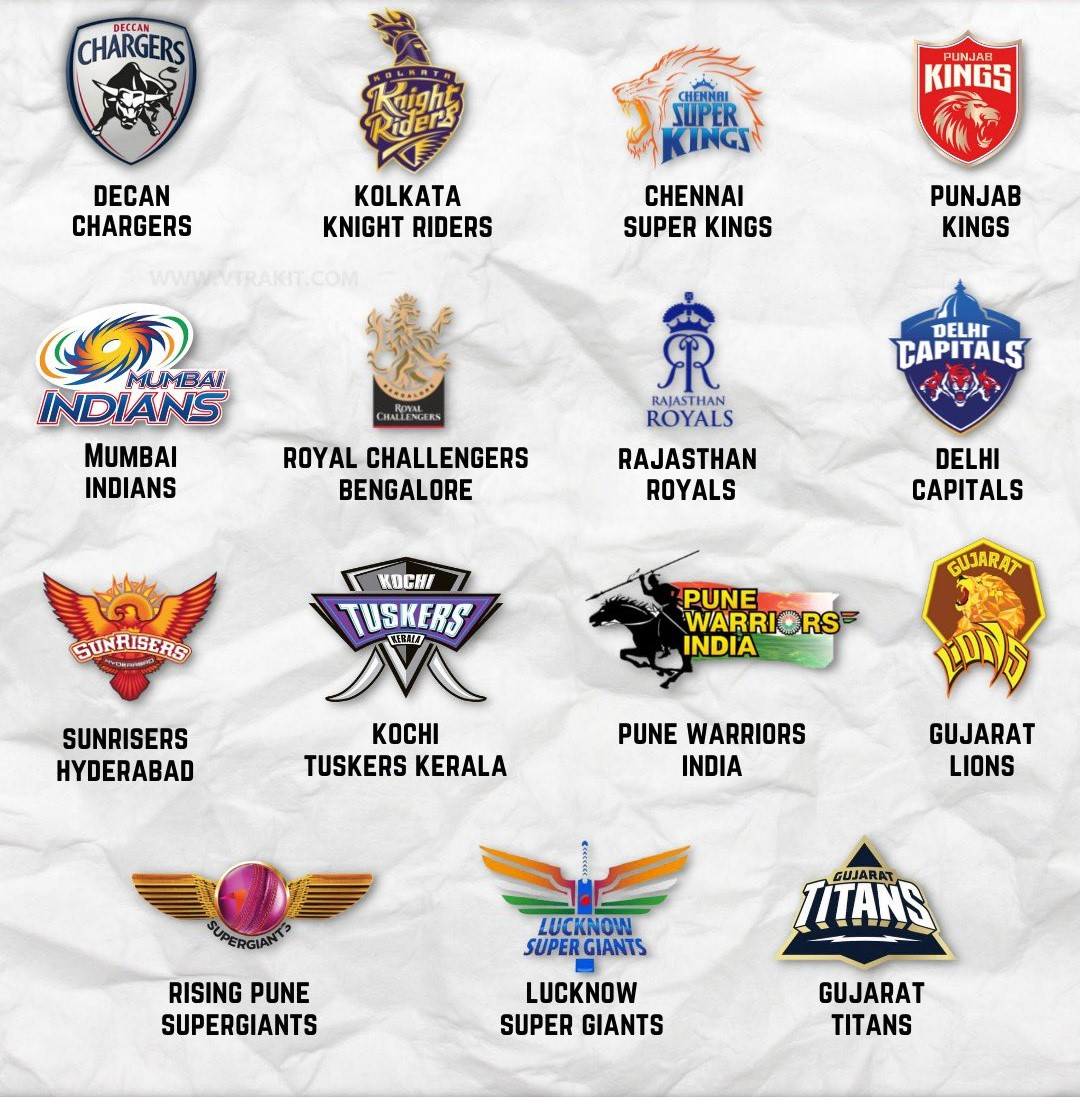

## Dataset Description:
<li><b>id:</b>                 Unique Match ID as per ESPNCricinfo.
<li><b>inning:</b>             Inning Number.
<li><b>over:</b >              Over Number.
<li><b>ball:</b>               Ball Number.
<li><b>batsman:</b>            Batsman on strike.
<li><b>non_striker:</b>        Batsman at non-striker.
<li><b>bowler:</b>             Bowler.
<li><b>batsman_runs:</b>       Runs off bat.
<li><b>extra_runs:</b>         Extra runs.
<li><b>total_runs:</b>         Total Runs.
<li><b>non_boundary:</b>       If there are overthrows.
<li><b>is_wicket:</b>          Is the delivery a wicket?.
<li><b>dismissal_kind:</b>     Type of dismissal.
<li><b>player_dismissed:</b>   Player who got dismissed.
<li><b>fielder:</b>            Fielder involved in the dismissal.
<li><b>extras_type:</b>        Type of extras.
<li><b>batting_team:</b>       Batting team.
<li><b>bowling_team:</b>       Bowling team.

# Tasks/Activities List:
Your code should contain the following activities/Analysis:
<li>Read the IPL dataset.
<li>Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.
<li>Analyze the data.
<li>Generate all the relevant features to represent a batsman like total runs scored, strike rate,etc.
<li>Apply all the different clustering algorithms on this batsmen dataset like Kmeans, DBSCAN and Hierarchical clustering algorithms.
<li>Evaluate the clustering results using a performance metric.
<li>Visualize the clustered dataset.

## Success Metrics:
Below are the metrics for the successful submission of this case study:<li></b>
The cluster with the best IPL players of all time must have players who played atleast 100 matches and scored > 2500 runs.

# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">1: Import Libraries</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from collections import Counter
import matplotlib.gridspec as gridspec
from tabulate import tabulate

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.neighbors import NearestNeighbors
from itertools import product
from sklearn.cluster import DBSCAN 

%matplotlib inline

# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">2: Read dataset</p>

In [2]:
ipl_df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [3]:
pd.set_option('display.max_rows', 50)

In [4]:
ipl_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
ipl_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [6]:
ipl_df['bowling_team'].nunique()

15

# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">3: Dataset Overview</p>

In [7]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">3.1: Summary statistics for Numeric Features</p>

In [8]:
ipl_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193468.0,756768.808439,306097.091418,335982.0,501227.0,729297.0,1082628.0,1237181.0
inning,193468.0,1.482131,0.499682,1.0,1.0,1.0,2.0,2.0
over,193468.0,9.177027,5.676848,0.0,4.0,9.0,14.0,19.0
ball,193468.0,3.615967,1.807128,1.0,2.0,4.0,5.0,9.0
batsman_runs,193468.0,1.240231,1.610867,0.0,0.0,1.0,1.0,6.0
extra_runs,193468.0,0.066414,0.339991,0.0,0.0,0.0,0.0,7.0
total_runs,193468.0,1.306645,1.598802,0.0,0.0,1.0,1.0,7.0
non_boundary,193468.0,0.000083,0.009094,0.0,0.0,0.0,0.0,1.0
is_wicket,193468.0,0.049078,0.216031,0.0,0.0,0.0,0.0,1.0


# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">3.2: Summary statistics of Categorical Features</p>

In [9]:
ipl_df.describe(include="object")

,batsman,non_striker,bowler,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
count,193468,193468,193468,9495,9495,6784,10233,193468,193277
unique,537,530,420,9,506,879,5,15,15
top,V Kohli,S Dhawan,Harbhajan Singh,caught,RG Sharma,MS Dhoni,wides,Mumbai Indians,Mumbai Indians
freq,4609,4593,3451,5743,167,164,5858,24466,24453


# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">4: EDA</p>

## 4.1: Top 5 Highest Scoring Teams</p>

Top 5 Highest Scoring Teams:
batting_team
Mumbai Indians                 32286
Royal Challengers Bangalore    30214
Kings XI Punjab                30017
Kolkata Knight Riders          29383
Chennai Super Kings            28363
Name: total_runs, dtype: int64 



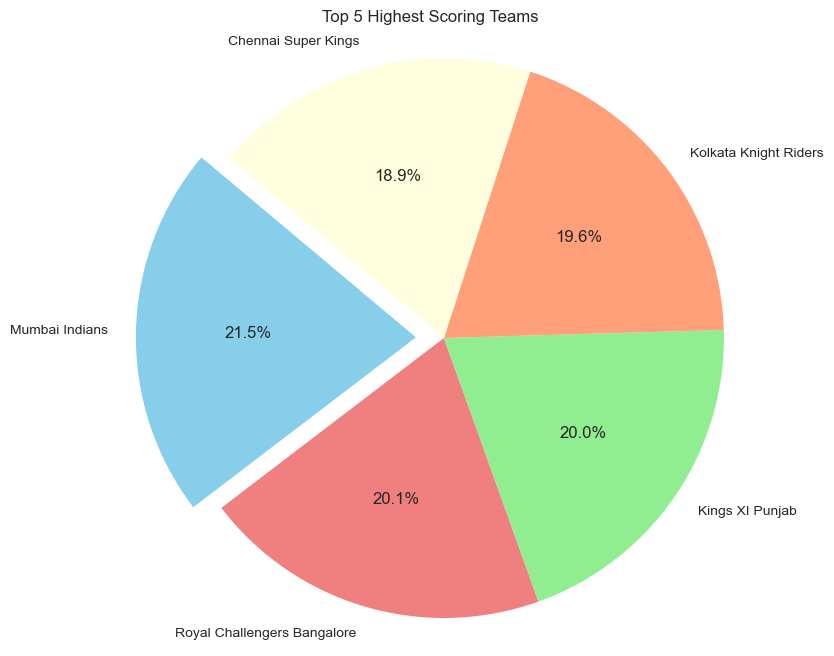

In [10]:
# Group the dataset by the batting team's name
team_stats = ipl_df.groupby('batting_team')

# Calculate the total runs scored by each team
total_runs_by_team = team_stats['total_runs'].sum()

# Sort the teams based on the total runs scored in descending order
top_scoring_teams = total_runs_by_team.sort_values(ascending=False)

# Select the top 5 highest-scoring teams
top_5_teams = top_scoring_teams.head(5)

# Display the top 5 highest-scoring teams
print("Top 5 Highest Scoring Teams:")
print(top_5_teams, "\n")

# Define custom colors for the pie chart
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightyellow']

# Create a pie chart with custom colors and explode the slice for the highest-scoring team
explode = (0.1, 0, 0, 0, 0)

plt.figure(figsize=(10, 8))
plt.pie(top_5_teams, labels=top_5_teams.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Top 5 Highest Scoring Teams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 4.2: Top 10 Batsmen in IPL - Seasons 2008-2020

In [11]:
# Assuming you have a DataFrame named ipl_df containing IPL data

# Group the dataset by player name
player_stats = ipl_df.groupby('batsman')

# Calculate total runs scored by each player across all seasons
total_runs_by_player = player_stats['batsman_runs'].sum()

# Calculate batting average for each player
batting_average = player_stats['batsman_runs'].mean()

# Calculate strike rate for each player
strike_rate = (total_runs_by_player / player_stats['ball'].count()) * 100

# Combine the statistics into a single DataFrame
player_summary = pd.DataFrame({
    'Total Runs': total_runs_by_player,
    'Batting Average': batting_average,
    'Strike Rate': strike_rate
})

# Rank the players based on total runs scored
top_10_batsmen = player_summary.sort_values(by='Total Runs', ascending=False).head(10)

# Display the top 10 batsmen
print("Top 10 Batsmen in IPL - Seasons 2008-2020:")
print(top_10_batsmen)

Top 10 Batsmen in IPL - Seasons 2008-2020:
                Total Runs  Batting Average  Strike Rate
batsman                                                 
V Kohli               5878         1.275331   127.533087
SK Raina              5368         1.328384   132.838406
DA Warner             5254         1.375753   137.575281
RG Sharma             5230         1.279354   127.935421
S Dhawan              5197         1.235029   123.502852
AB de Villiers        4849         1.485600   148.560049
CH Gayle              4772         1.427887   142.788749
MS Dhoni              4632         1.326081   132.608073
RV Uthappa            4607         1.259431   125.943138
G Gambhir             4217         1.196652   119.665153


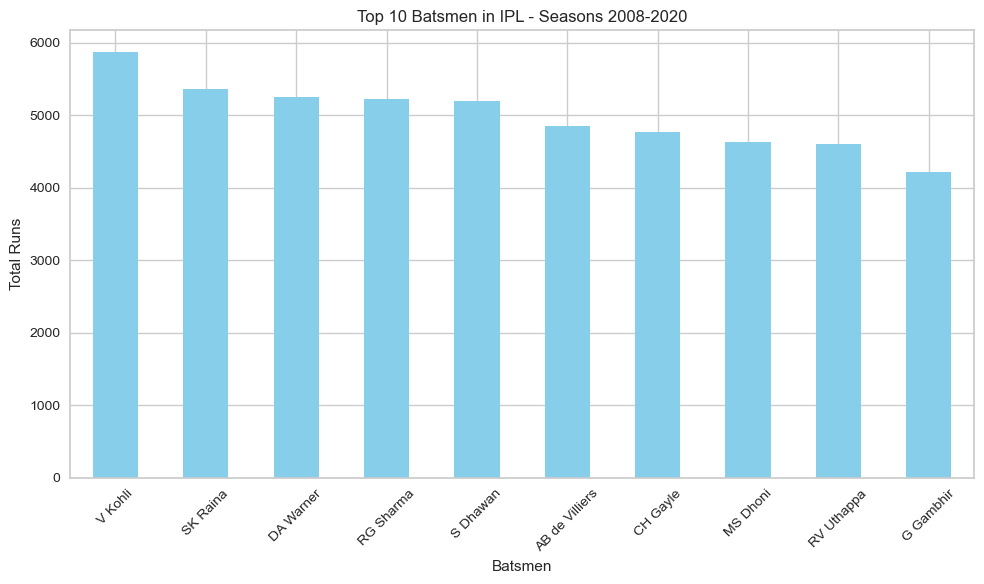

In [12]:
# Group the dataset by player name
player_stats = ipl_df.groupby('batsman')

# Calculate total runs scored by each player across all seasons
total_runs_by_player = player_stats['batsman_runs'].sum()

# Sort the players based on total runs scored in descending order
top_10_batsmen = total_runs_by_player.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_batsmen.plot(kind='bar', color='skyblue')
plt.title('Top 10 Batsmen in IPL - Seasons 2008-2020')
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4.3: Top 10 High Wicket-Taking Bowlers

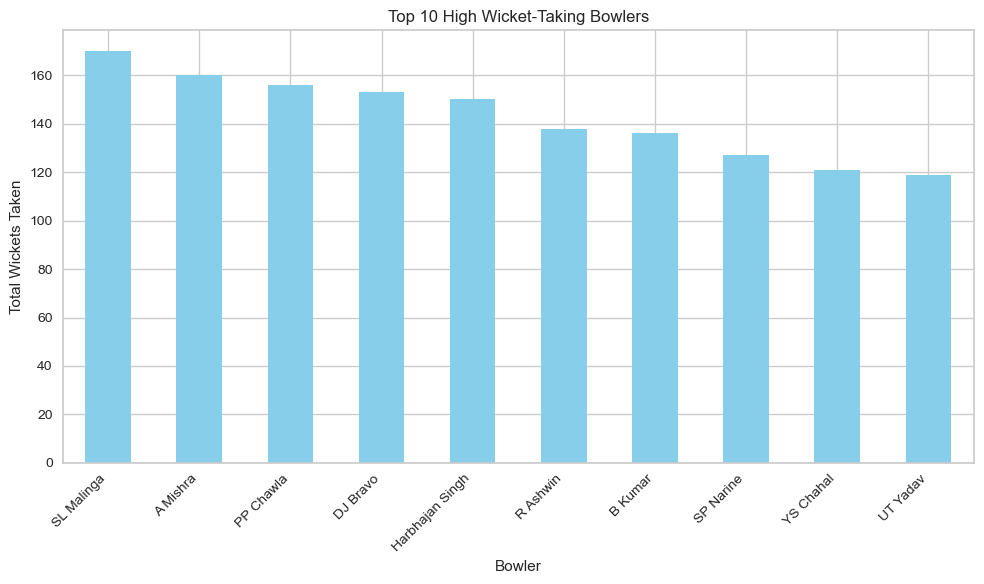

In [13]:
# Filter out the instances where dismissal_kind is 'run out'
filtered_ipl_df = ipl_df[ipl_df['dismissal_kind'] != 'run out']

# Group the filtered dataset by bowler's name and count the wickets taken by each bowler
top_bowlers = filtered_ipl_df[filtered_ipl_df['is_wicket'] == 1].groupby('bowler').size().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_bowlers.plot(kind='bar', color='skyblue')
plt.title('Top 10 High Wicket-Taking Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets Taken')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
top_10_bowlers = top_bowlers.head(10)

# Display the top 10 bowlers
print("Top 10 High Wicket-Taking Bowlers:")
print(top_10_bowlers)

Top 10 High Wicket-Taking Bowlers:
bowler
SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           153
Harbhajan Singh    150
R Ashwin           138
B Kumar            136
SP Narine          127
YS Chahal          121
UT Yadav           119
dtype: int64


## 4.4: Top 10 Best Fielders in IPL - Seasons 2008-2020

Top 10 Best Fielders:
fielder
MS Dhoni          164
KD Karthik        156
RV Uthappa        123
AB de Villiers    117
SK Raina          105
RG Sharma          92
PA Patel           91
KA Pollard         88
V Kohli            83
WP Saha            83
dtype: int64


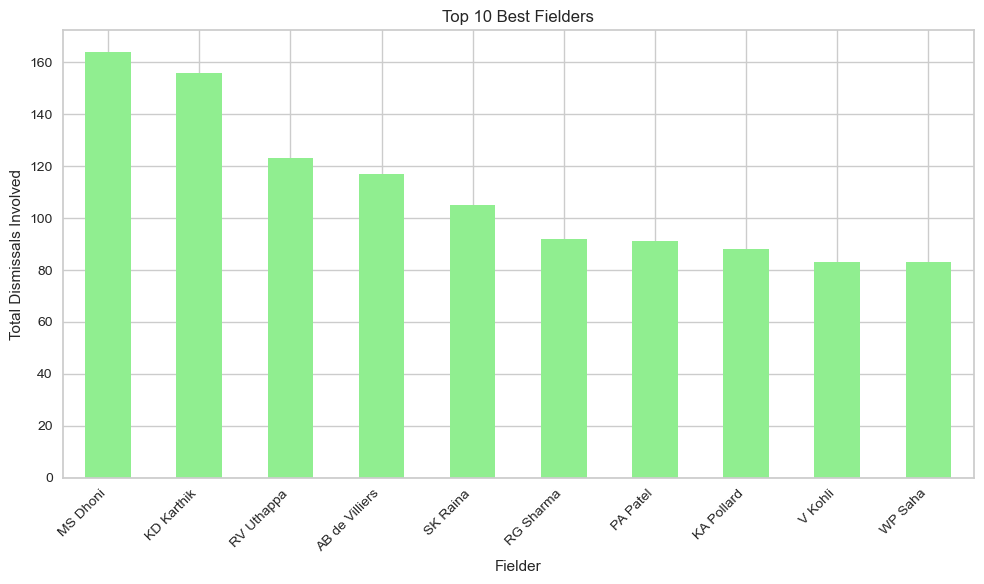

In [15]:
# Filter the dataset to include only instances where a fielder is involved in a dismissal
dismissals_with_fielder = ipl_df[ipl_df['fielder'].notnull()]

# Group the filtered dataset by the fielder's name
fielder_stats = dismissals_with_fielder.groupby('fielder')

# Calculate the total number of dismissals in which each fielder was involved
dismissals_count = fielder_stats.size()

# Sort the fielders based on the number of dismissals in descending order
top_fielders = dismissals_count.sort_values(ascending=False)

top_10_fielders = top_fielders.head(10)

# Display the top 5 fielders
print("Top 10 Best Fielders:")
print(top_10_fielders)

# Plotting
plt.figure(figsize=(10, 6))
top_10_fielders.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Best Fielders')
plt.xlabel('Fielder')
plt.ylabel('Total Dismissals Involved')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
top_10_fielders = top_fielders.head(10)

# Display the top 5 fielders
print("Top 10 Best Fielders:")
print(top_10_fielders)

Top 10 Best Fielders:
fielder
MS Dhoni          164
KD Karthik        156
RV Uthappa        123
AB de Villiers    117
SK Raina          105
RG Sharma          92
PA Patel           91
KA Pollard         88
V Kohli            83
WP Saha            83
dtype: int64


# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">5: Data cleaning</p>

## 5.1: Handling Repeated and similar data

In [17]:
ipl_df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [18]:
ipl_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [19]:
# Define replacements using a dictionary
team_replacements = {
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Delhi Daredevils': 'Delhi Capitals'
}

# Apply replacements to 'batting_team' and 'bowling_team' columns
ipl_df['batting_team'].replace(team_replacements, inplace=True)
ipl_df['bowling_team'].replace(team_replacements, inplace=True)



<div style="background-color: #FFFAFA; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
</head>
<body>
    <h2>Inference:</h2>
    <p><strong>Rising Pune Supergiants</strong> and <strong>Rising Pune Supergiant</strong> are similar and likely represent the same team. One of them might be a typo or variation in the naming convention.</p>
    <p><strong>Delhi Daredevils</strong> and <strong>Delhi Capitals</strong> are similar and likely represent the same team. "<em>Delhi Daredevils</em>" was the former name of the team, which was later changed to "<em>Delhi Capitals</em>".</p>
</body>
</html>

## 5.2: Handling Null/Empty values

In [20]:
# checking for null values 
null = pd.DataFrame({'Null Values' : ipl_df.isna().sum(), 'Percentage Null Values' : (ipl_df.isna().sum()) /len(ipl_df) * (100)})
null

,Null Values,Percentage Null Values
id,0,0.000000
inning,0,0.000000
over,0,0.000000
ball,0,0.000000
batsman,0,0.000000
non_striker,0,0.000000
bowler,0,0.000000
batsman_runs,0,0.000000
extra_runs,0,0.000000
total_runs,0,0.000000


## 5.2.1: handling Dismissal_Kind column

In [21]:
ipl_df['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

## 5.2.2: handling player_dismissed column

In [22]:
#  Check if NaN values in 'dismissal_kind' correspond to 'is_wicket' == 0
nan_dismissal = ipl_df[ipl_df['dismissal_kind'].isna() & (ipl_df['is_wicket'] == 0)]
print("Number of rows where 'dismissal_kind' is NaN and 'is_wicket' is 0:", len(nan_dismissal))

Number of rows where 'dismissal_kind' is NaN and 'is_wicket' is 0: 183973


In [23]:
#  Check if NaN values in 'dismissal_kind' correspond to 'is_wicket' == 0
nan_dismissal = ipl_df[ipl_df['dismissal_kind'].isna() & (ipl_df['is_wicket'] == 0)]
print("Number of rows where 'dismissal_kind' is NaN and 'is_wicket' is 0:", len(nan_dismissal))

Number of rows where 'dismissal_kind' is NaN and 'is_wicket' is 0: 183973


In [24]:
# Fill NaN values in 'dismissal_kind' with 'not out'
ipl_df['dismissal_kind'].fillna('not out', inplace=True)

## 5.2.3: handling fielder column

In [25]:
ipl_df['fielder'].fillna('Not Applicable', inplace=True)

In [26]:
ipl_df['extras_type'].unique()

array([nan, 'byes', 'wides', 'legbyes', 'noballs', 'penalty'],
      dtype=object)

In [27]:
ipl_df['extras_type'].fillna('standard', inplace=True)

<div style="background-color: #FFFAFA; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
</head>
<body>
    <h2>Inference:</h2>
    <p><strong>Considering cricket terminology, when a ball results in no extra runs, it signifies a standard delivery without any specific type of extra. Therefore, for the extras_type column, the appropriate value for such cases would be "None" or "Standard". This indicates that the ball did not yield any additional runs beyond those scored by the batsman.</p>
</body>
</html>

## 5.2.4: handling bowling_team column

In [28]:
ipl_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Capitals',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions'],
      dtype=object)

In [29]:
ipl_df.dropna(subset=['bowling_team'],inplace=True)

# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">6: Generate relevant features Batsman</p>

In [30]:
import pandas as pd

# Group the dataset by batsman
batsman_stats = ipl_df.groupby('batsman')

# Calculate the number of matches played by each batsman
num_matches = batsman_stats['id'].nunique()

# Calculate the total runs scored by each batsman
total_runs = batsman_stats['batsman_runs'].sum()

# Calculate the number of balls faced by each batsman
balls_faced = batsman_stats['ball'].count()

# Calculate the number of sixes hit by each batsman
num_sixes = batsman_stats.apply(lambda x: (x['batsman_runs'] == 6).sum())

# Calculate the number of fours scored by each batsman
num_fours = batsman_stats.apply(lambda x: (x['batsman_runs'] == 4).sum())

# Calculate strike rate for each batsman
strike_rate = (total_runs / balls_faced) * 100

# Combine the statistics into a single DataFrame
batsman_data = pd.DataFrame({
    'matches_played': num_matches,
    'total_runs': total_runs,
    'balls_faced': balls_faced,
    'strike_rate': strike_rate,
    'sixes': num_sixes,
    'fours': num_fours
})

# Fill NaN values in 'sixes' and 'fours' columns with 0
batsman_data['sixes'] = batsman_data['sixes'].fillna(0)
batsman_data['fours'] = batsman_data['fours'].fillna(0)

# Display the first few rows of the DataFrame
batsman_data.reset_index(inplace=True)
batsman_data.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,23,280,196,142.857143,15,16
1,A Chandila,2,4,7,57.142857,0,0
2,A Chopra,6,53,75,70.666667,0,7
3,A Choudhary,3,25,20,125.000000,1,1
4,A Dananjaya,1,4,5,80.000000,0,0


In [31]:
batsman_data.describe().T

,count,mean,std,min,25%,50%,75%,max
matches_played,537.0,22.623836,34.848928,1.0,3.0,8.000000,23.000000,194.0
total_runs,537.0,446.387337,924.737734,0.0,15.0,76.000000,327.000000,5877.0
balls_faced,537.0,359.919926,718.296954,1.0,17.0,74.000000,290.000000,4605.0
strike_rate,537.0,100.900426,37.584985,0.0,80.0,107.948244,125.773196,250.0
sixes,537.0,16.564246,37.625859,0.0,0.0,2.000000,13.000000,348.0
fours,537.0,40.744879,87.587952,0.0,1.0,6.000000,27.000000,591.0


In [32]:
batsman_data.columns

Index(['batsman', 'matches_played', 'total_runs', 'balls_faced', 'strike_rate',
       'sixes', 'fours'],
      dtype='object')

In [33]:
batsman_data.shape[0]

537

# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">7: Outlier Detection and treatment</p>

In [34]:
batsman_data_cleaned_DBSCAN = batsman_data.copy()

In [35]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
batsman_data['Outlier_Scores'] = model.fit_predict(batsman_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
batsman_data['Is_Outlier'] = [1 if x == -1 else 0 for x in batsman_data['Outlier_Scores']]

# Display the first few rows of the batsman_data dataframe
batsman_data.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours,Outlier_Scores,Is_Outlier
0,A Ashish Reddy,23,280,196,142.857143,15,16,1,0
1,A Chandila,2,4,7,57.142857,0,0,1,0
2,A Chopra,6,53,75,70.666667,0,7,1,0
3,A Choudhary,3,25,20,125.000000,1,1,1,0
4,A Dananjaya,1,4,5,80.000000,0,0,1,0


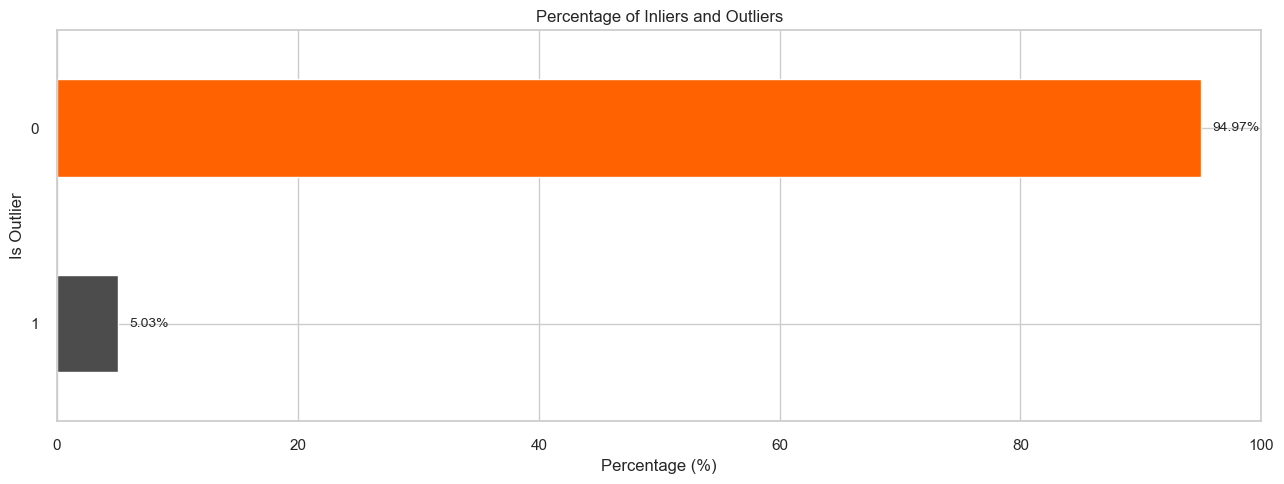

In [36]:
# Calculate the percentage of inliers and outliers
outlier_percentage = batsman_data['Is_Outlier'].value_counts(normalize=True) * 100

# Set plot style
sns.set(style='whitegrid')

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(13, 5))
colors = ['#ff6200', '#4c4c4c']
outlier_percentage.plot(kind='barh', color=colors)

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value + 1, index, f'{value:.2f}%', fontsize=10, va='center')

plt.title('Percentage of Inliers and Outliers')
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.xlim(0, 100)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [37]:
# Getting the number of rows in the cleaned customer dataset
batsman_data.shape[0]

537

In [38]:
batsman_data.drop(columns=['Outlier_Scores', 'Is_Outlier'], axis=1, inplace=True)

In [39]:
batsman_data_cleaned = batsman_data.copy()
batsman_data_cleaned

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,23,280,196,142.857143,15,16
1,A Chandila,2,4,7,57.142857,0,0
2,A Chopra,6,53,75,70.666667,0,7
3,A Choudhary,3,25,20,125.000000,1,1
4,A Dananjaya,1,4,5,80.000000,0,0
...,...,...,...,...,...,...,...
532,YV Takawale,10,192,183,104.918033,3,26
533,Yashpal Singh,4,47,67,70.149254,0,5
534,Younis Khan,1,3,7,42.857143,0,0
535,Yuvraj Singh,126,2750,2205,124.716553,149,217


In [40]:
batsman_data_cleaned.isnull().sum()

batsman           0
matches_played    0
total_runs        0
balls_faced       0
strike_rate       0
sixes             0
fours             0
dtype: int64

# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">8: Feature scaling</p>

In [41]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['batsman']

# Identify columns to scale
columns_to_scale = batsman_data_cleaned.columns.difference(columns_to_exclude)

# Create a copy of the cleaned dataset
batsman_data_scaled = batsman_data_cleaned.copy()

# Scale the selected columns
batsman_data_scaled[columns_to_scale] = scaler.fit_transform(batsman_data_cleaned[columns_to_scale])

# Display the first few rows of the scaled data
batsman_data_scaled.head()


,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,0.010804,-0.180097,-0.228419,1.117357,-0.041612,-0.282778
1,A Chandila,-0.592359,-0.478838,-0.491787,-1.165316,-0.440646,-0.465622
2,A Chopra,-0.477471,-0.425801,-0.397030,-0.805161,-0.440646,-0.385628
3,A Choudhary,-0.563637,-0.456108,-0.473672,0.641800,-0.414044,-0.454194
4,A Dananjaya,-0.621081,-0.478838,-0.494574,-0.556603,-0.440646,-0.465622


# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">9: K-Means Clustering</p>

## 9.1: Elbow Method

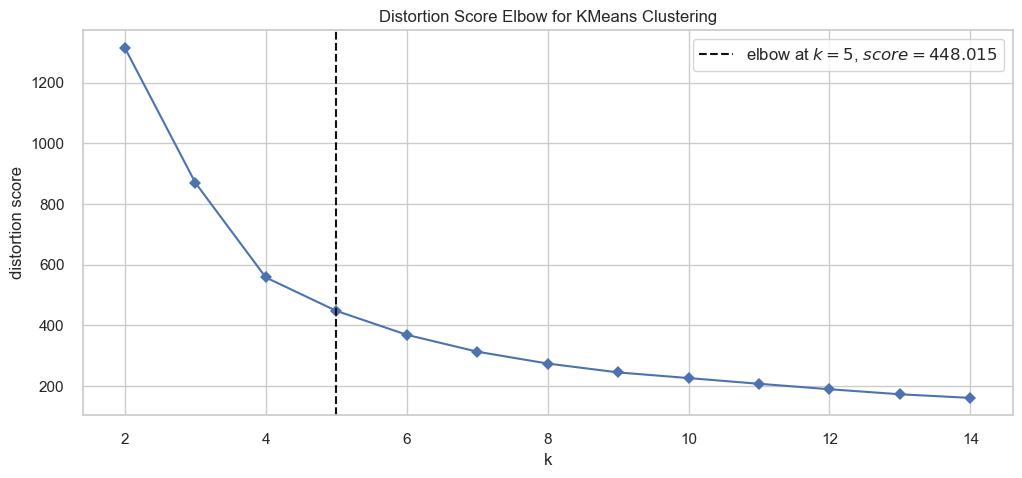

In [42]:
# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(batsman_data_scaled.iloc[:,1:])

# Finalize and render the figure
visualizer.show();

## 9.2: Silhouette Method

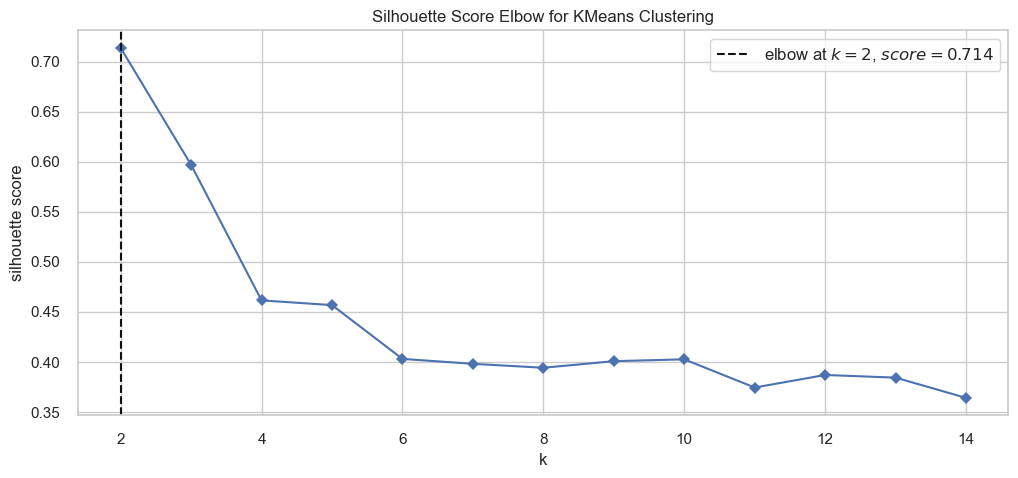

In [43]:
# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and specify the metric
visualizer = KElbowVisualizer(km, k=(2, 15), metric='silhouette', timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(batsman_data_scaled.iloc[:,1:])

# Finalize and render the figure
visualizer.show();

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

def silhouette_analysis(df, start_k, stop_k, figsize=(15,16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.

    Parameters:
    - df (DataFrame): Input data for clustering.
    - start_k (int): Starting number of clusters (inclusive).
    - stop_k (int): Ending number of clusters (inclusive).
    - figsize (tuple, optional): Size of the figure for visualization. Default is (15, 16).
    """

    plt.figure(figsize=figsize)

    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    first_plot = plt.subplot(grid[0, :])

    silhouette_scores = []

    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)
        
    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)
    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='top', 
             horizontalalignment='left', bbox=dict(facecolor='#FFffff', edgecolor='red', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)
        
         # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

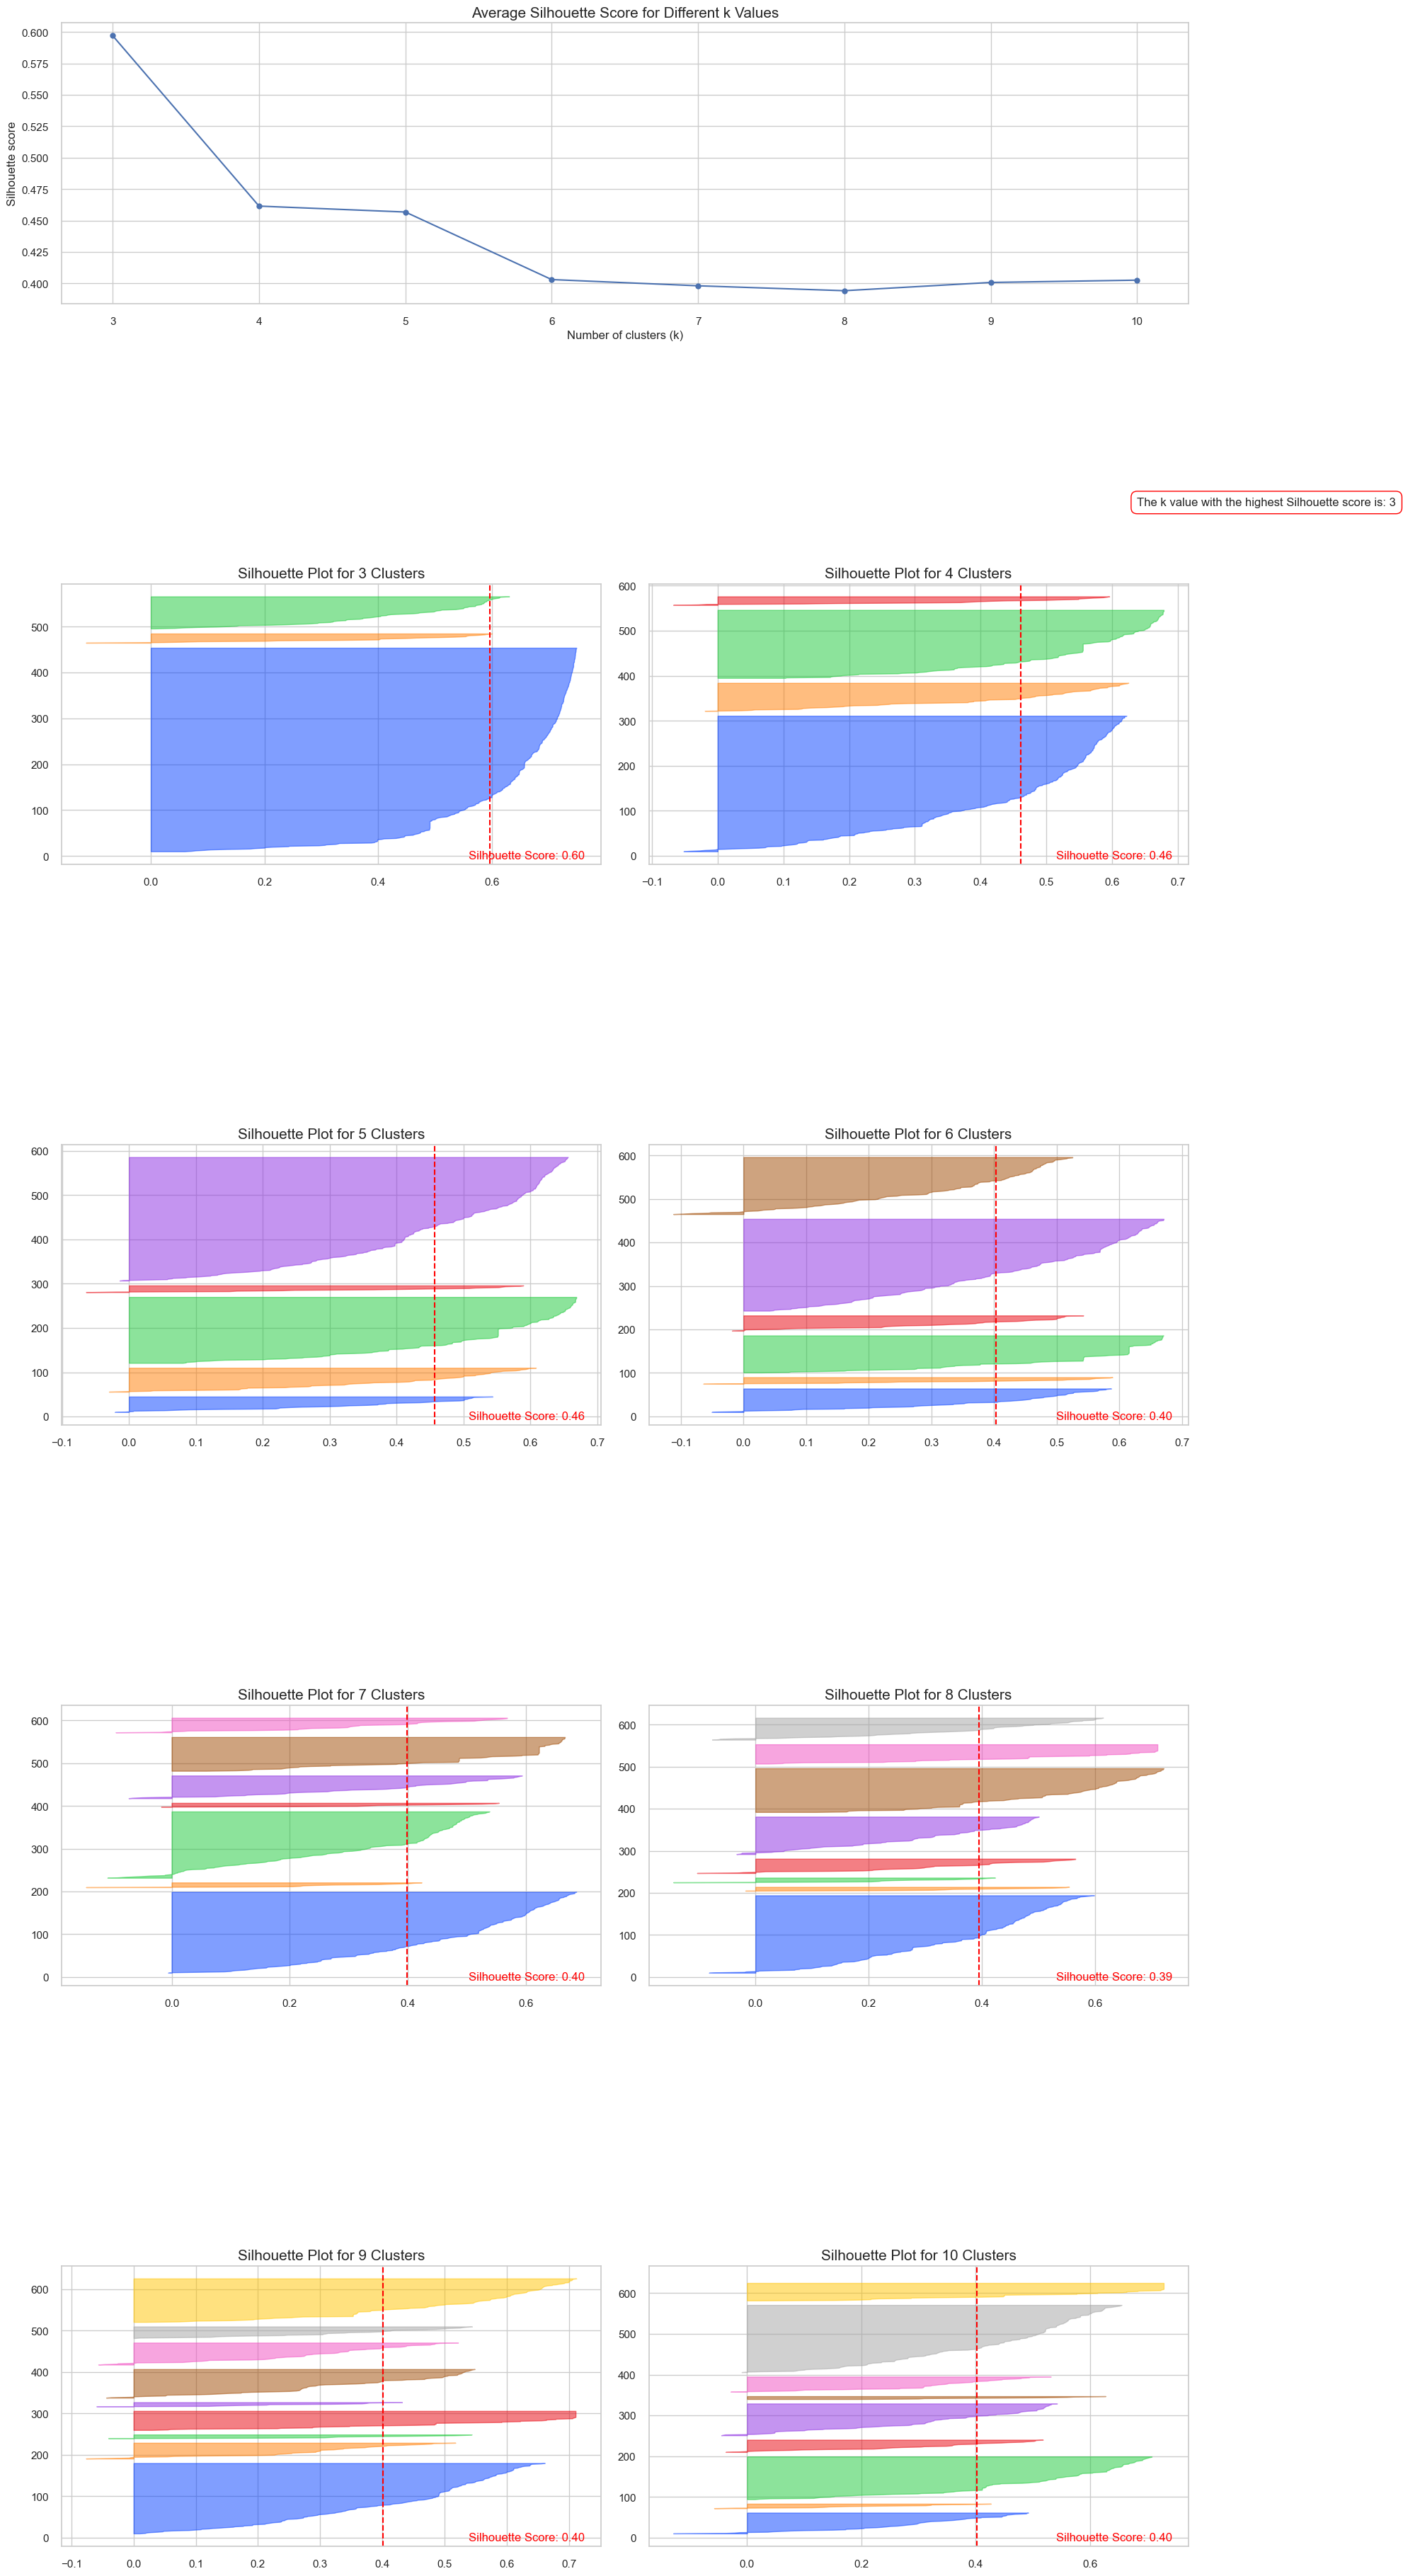

In [45]:
silhouette_analysis(batsman_data_scaled.iloc[:,1:], 3, 10, figsize=(20, 60))

## 9.3: Clustering Model - K-means

In [46]:
# Define the optimal number of clusters
optimal_k = 4

# Instantiate KMeans clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=100, random_state=0)

# Fit KMeans to the scaled data
kmeans.fit(batsman_data_scaled.iloc[:,1:])

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Define a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in enumerate(cluster_frequencies.most_common())}

# Define a custom mapping to assign labels as per your criteria
custom_mapping = {3: 0, 2: 1, 1: 2, 0: 3}

# Apply the custom mapping to get the new labels
new_labels = np.array([custom_mapping[label_mapping[label]] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
batsman_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the scaled dataset
batsman_data_scaled['cluster'] = new_labels

In [47]:
# Display the first few rows of the original dataframe
batsman_data_cleaned.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours,cluster
0,A Ashish Reddy,23,280,196,142.857143,15,16,3
1,A Chandila,2,4,7,57.142857,0,0,2
2,A Chopra,6,53,75,70.666667,0,7,2
3,A Choudhary,3,25,20,125.000000,1,1,3
4,A Dananjaya,1,4,5,80.000000,0,0,2


## 9.4: Evaluation Metrics

In [48]:
# Filter the data to include only players with at least 100 matches and more than 2500 runs
filtered_data = batsman_data_cleaned[(batsman_data_cleaned['total_runs'] > 2500) & 
                                     (batsman_data_cleaned['matches_played'] >= 100)]

# Identify the cluster(s) containing the filtered players
best_players_cluster = filtered_data['cluster'].unique()

# Analyze the characteristics of the players in the identified cluster(s)
print("Cluster(s) containing the best IPL players of all time:")

for cluster in best_players_cluster:
    print(f"Cluster {cluster}:")
    players_in_cluster = filtered_data[filtered_data['cluster'] == cluster]['batsman'].tolist()
    num_players = len(players_in_cluster)
    
    # Format the player names into a 5x5 grid with commas
    for i in range(0, num_players, 5):
        print(", ".join(players_in_cluster[i:i+5]))

    print()


Cluster(s) containing the best IPL players of all time:
Cluster 0:
AB de Villiers, AM Rahane, AT Rayudu, BB McCullum, CH Gayle
DA Warner, G Gambhir, KA Pollard, KD Karthik, MK Pandey
MS Dhoni, PA Patel, RG Sharma, RV Uthappa, S Dhawan
SK Raina, SR Watson, V Kohli, YK Pathan, Yuvraj Singh

Cluster 1:
M Vijay, SV Samson, V Sehwag



In [49]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate
# Separate the features and the cluster labels
X = batsman_data_scaled.drop(['cluster', 'batsman'], axis=1)
clusters = batsman_data_scaled['cluster']


# Compute the number of batsmen
num_batsmen = len(batsman_data_scaled)

# Compute the metrics
kmeans_silhouette_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Batsmen", num_batsmen],
    ["Silhouette Score", kmeans_silhouette_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='fancy_grid'))

╒═════════════════════════╤════════════╕
│ Metric                  │      Value │
╞═════════════════════════╪════════════╡
│ Number of Batsmen       │ 537        │
├─────────────────────────┼────────────┤
│ Silhouette Score        │   0.461543 │
├─────────────────────────┼────────────┤
│ Calinski Harabasz Score │ 847.918    │
├─────────────────────────┼────────────┤
│ Davies Bouldin Score    │   0.696074 │
╘═════════════════════════╧════════════╛


<div style="background-color: #FFFAFA; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">

<b>Inference</b>:<br>
    <li>The <b>Silhouette Score<b> of approximately <b>0.461<b> although not close to 1, still indicates a fair amount of separation between the             clusters.</li>
    <li>The <b>Calinski Harabasz Score<b> is <b>847.91<b> which is considerably high, indicating that the clusters are well-defined. A higher score in        this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the            data..</li>
    <li>The <b>Davies Bouldin Score<b> of <b>0.696<b> is a reasonable score, indicating a moderate level of similarity between each cluster and its             most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a               decent separation between the clusters..</li>

## 9.5: Vizualisation

## 9.5.1: Radar Chart

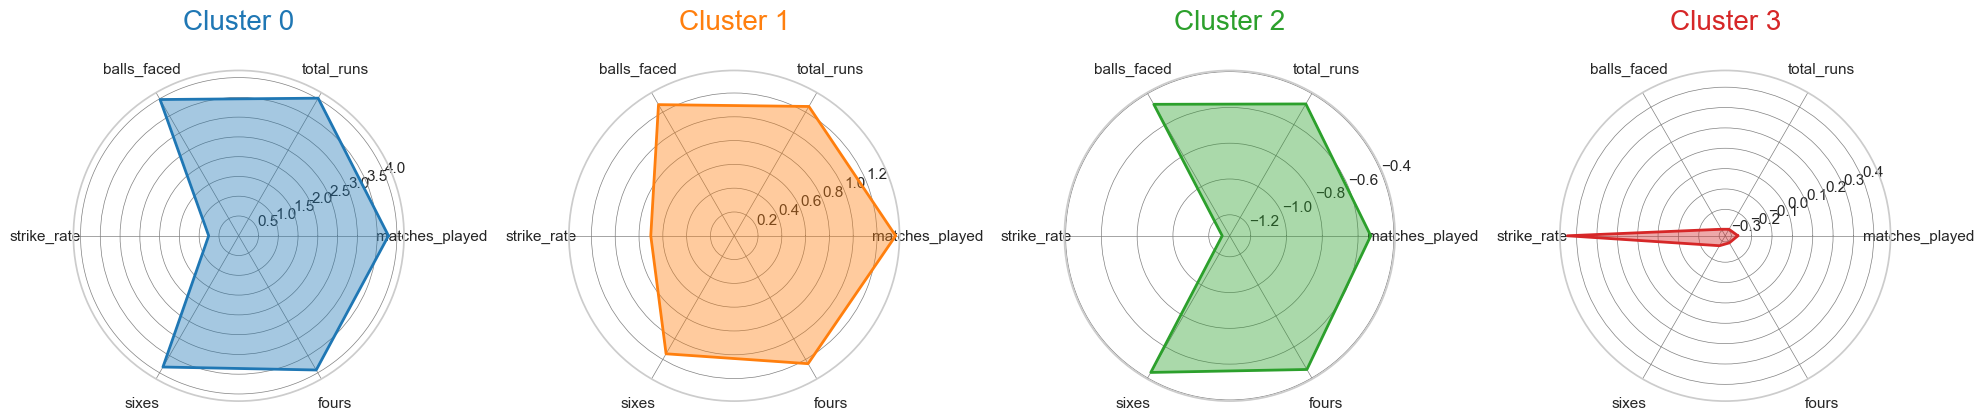

In [50]:
# Setting 'batsman' column as index and assigning it to a new dataframe
df_batsman = batsman_data_cleaned.set_index('batsman')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_batsman_standardized = scaler.fit_transform(df_batsman.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_batsman_standardized = pd.DataFrame(df_batsman_standardized, columns=df_batsman.columns[:-1], index=df_batsman.index)
df_batsman_standardized['cluster'] = df_batsman['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_batsman_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)
    
# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=4)

# Create radar chart for each cluster
for i, color in enumerate(sns.color_palette('tab10', n_colors=4)):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

    # Add input data
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

## 9.5.2: Histogram Chart Approach

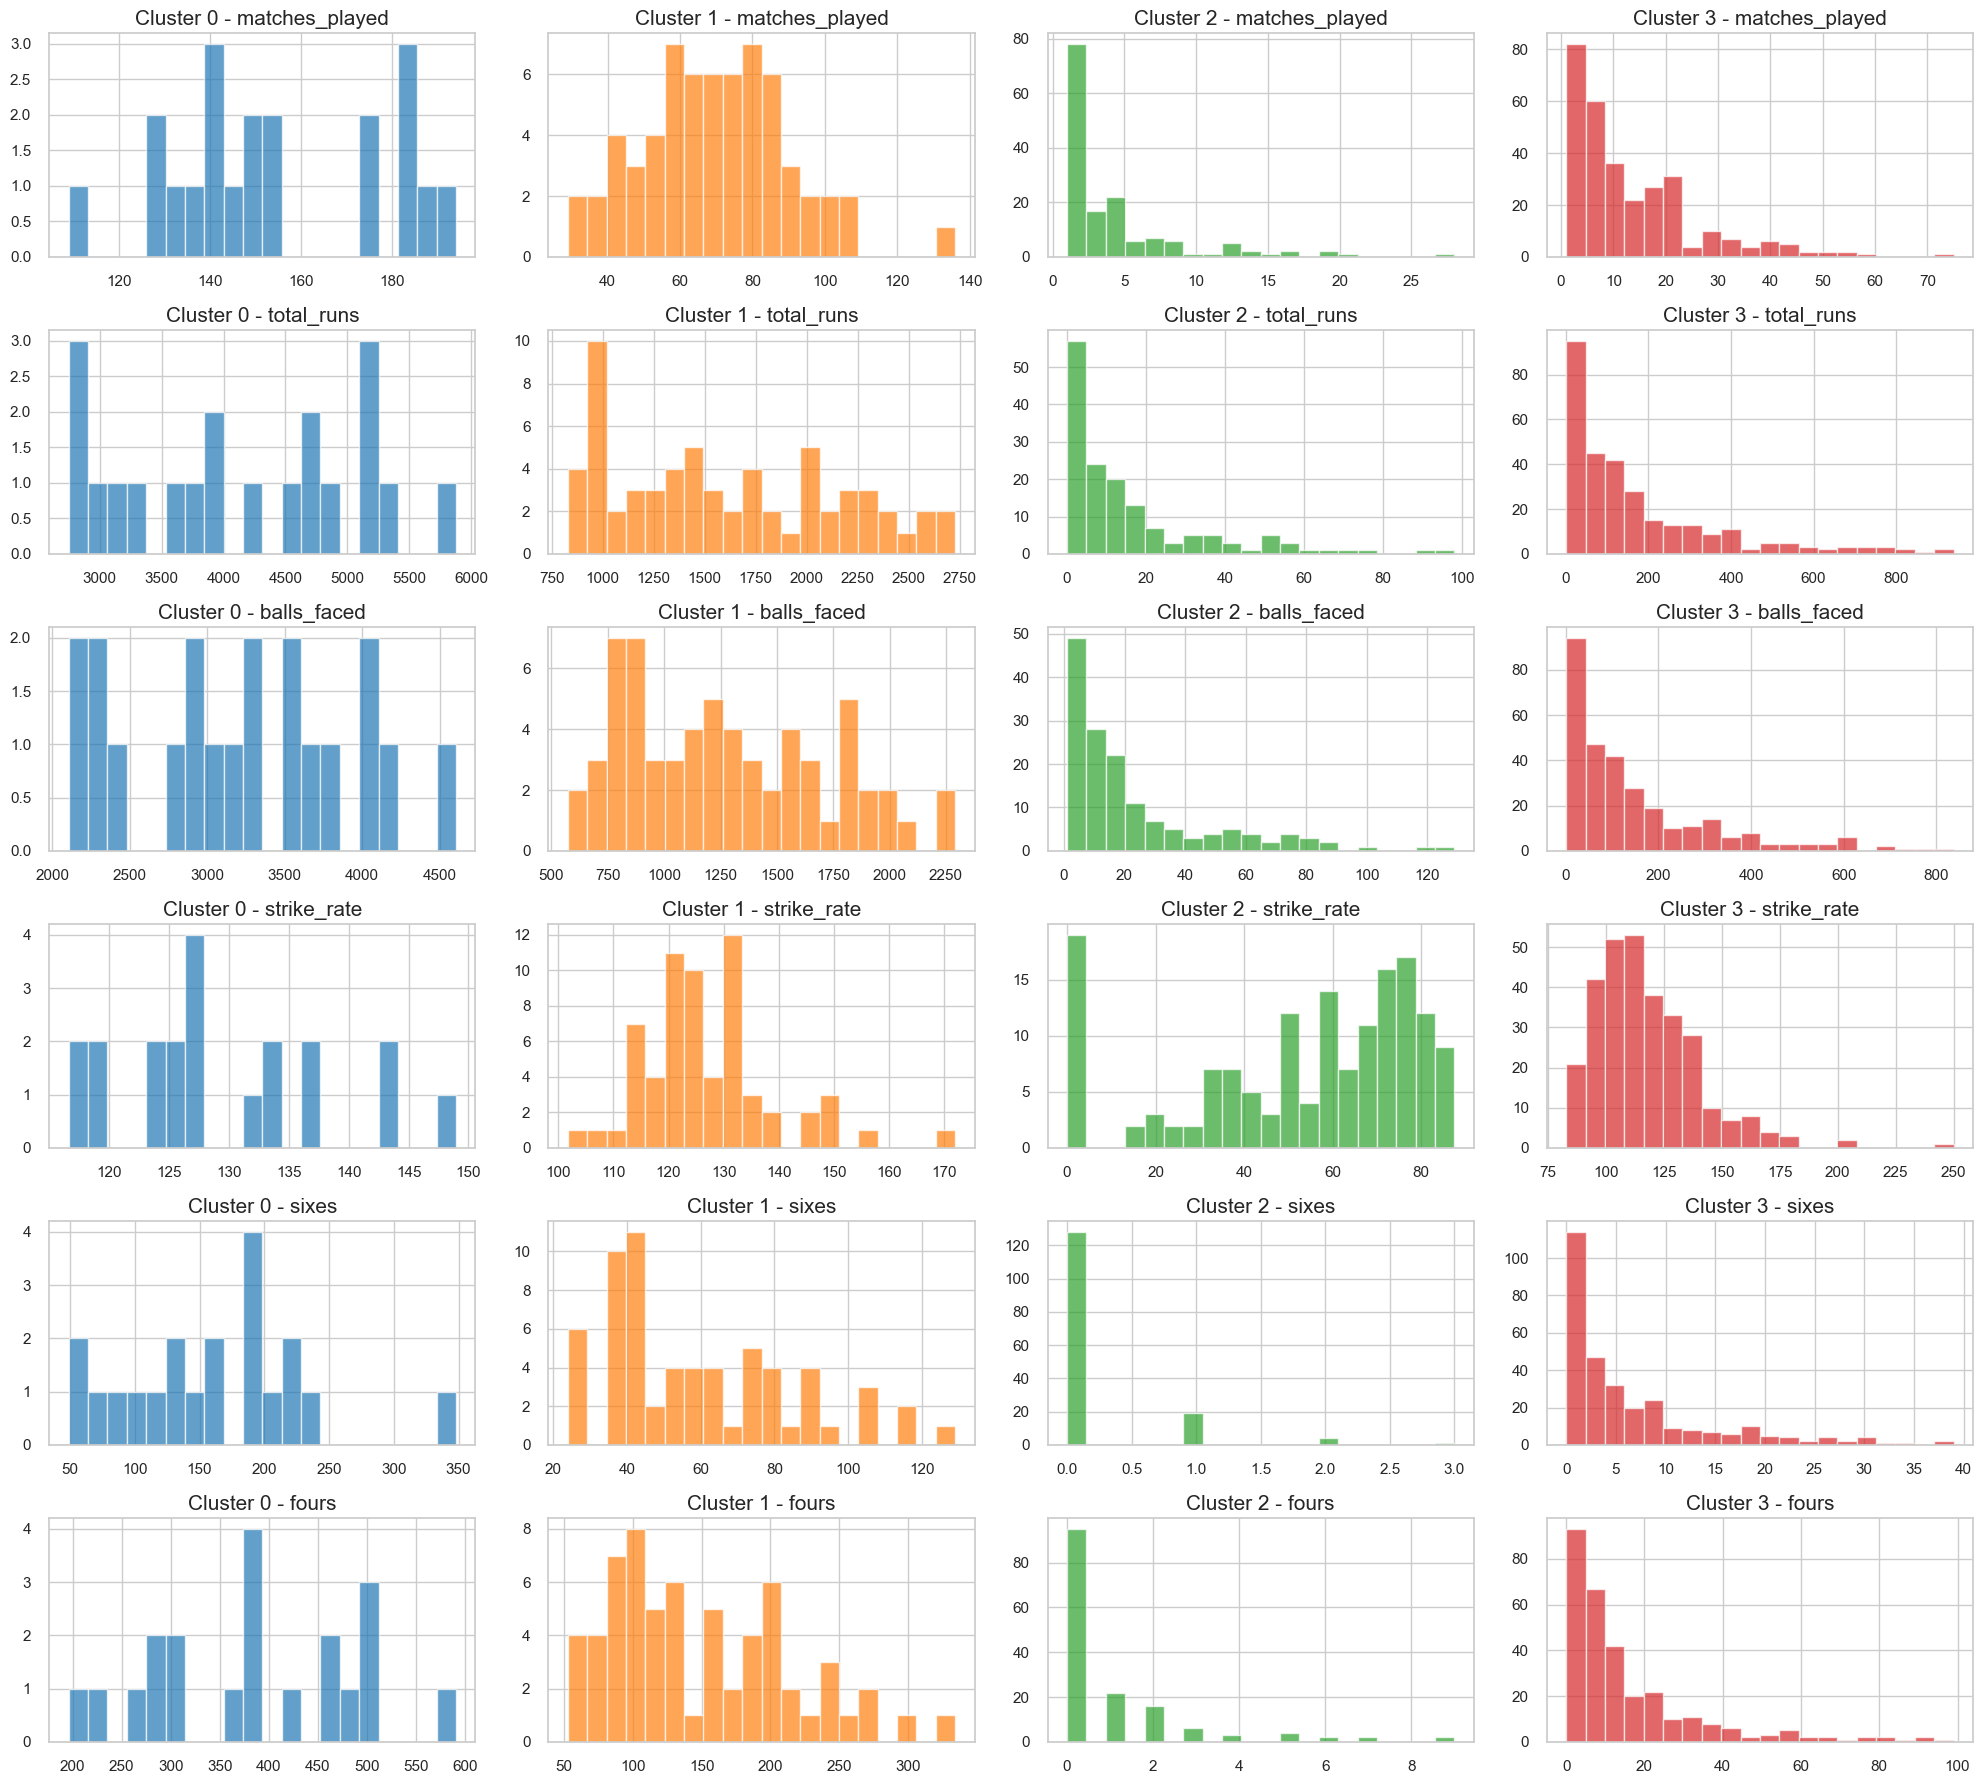

In [53]:
import seaborn as sns

# Get the number of clusters
num_clusters = len(clusters)

# Generate a color palette with enough distinct colors for the clusters
colors = sns.color_palette('tab10', n_colors=num_clusters)

# Plot histograms for each feature segmented by the clusters
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = batsman_data_cleaned[batsman_data_cleaned['cluster'] == cluster][feature]
        
        # Ensure that the color index does not exceed the number of clusters
        color_index = min(j, num_clusters - 1)
        
        axes[i, j].hist(data, bins=20, color=colors[color_index], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">10 : Hierarchical clustering</p>

In [54]:
batsman_data_scaled_hie = batsman_data_scaled.drop('cluster', axis=1).copy()
batsman_data_cleaned_hie = batsman_data_cleaned.drop('cluster',axis=1).copy()

In [55]:
batsman_data_scaled_hie.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,0.010804,-0.180097,-0.228419,1.117357,-0.041612,-0.282778
1,A Chandila,-0.592359,-0.478838,-0.491787,-1.165316,-0.440646,-0.465622
2,A Chopra,-0.477471,-0.425801,-0.397030,-0.805161,-0.440646,-0.385628
3,A Choudhary,-0.563637,-0.456108,-0.473672,0.641800,-0.414044,-0.454194
4,A Dananjaya,-0.621081,-0.478838,-0.494574,-0.556603,-0.440646,-0.465622


## 10.1: Dendrogram Plot

<Figure size 1200x800 with 0 Axes>

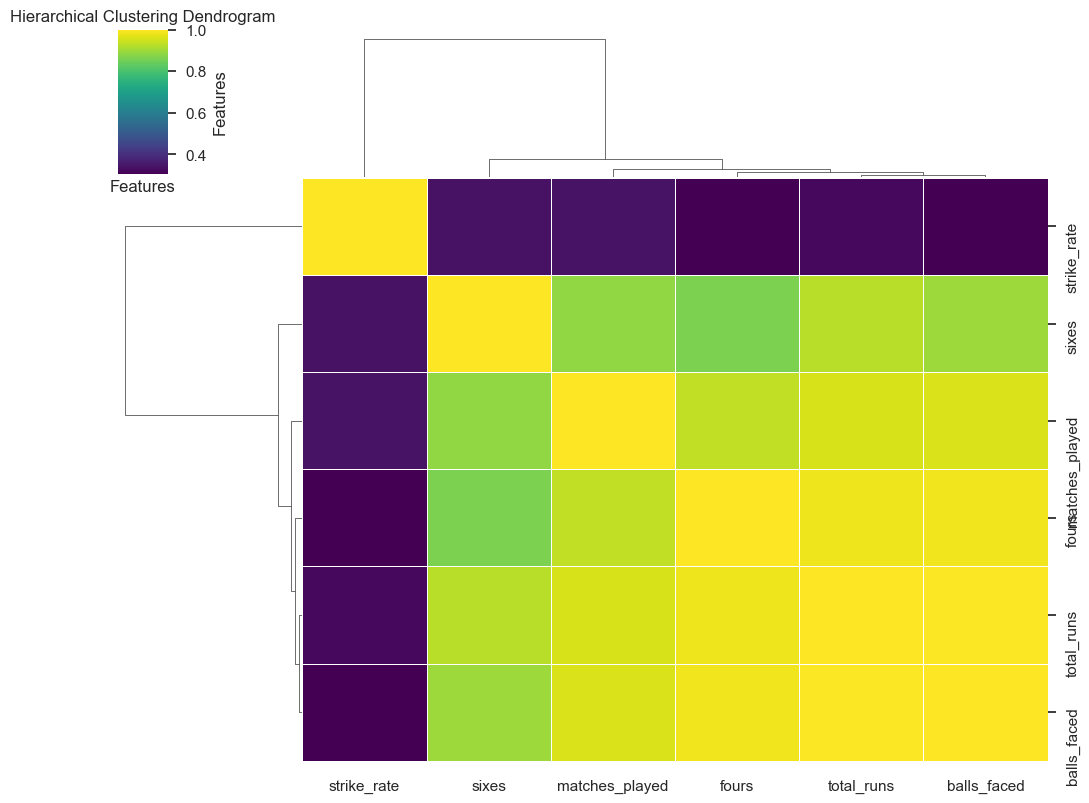

In [56]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a hierarchical clustermap
plt.figure(figsize=(12, 8))
sns.clustermap(correlation_matrix, cmap='viridis', linewidths=0.5, figsize=(10, 8))

# Add title and labels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the plot
plt.show()

## 10.2: Clustering Model - Hierarchical

In [57]:
## Instantiate Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

## Fit and predict the cluster for each data point
batsman_data_cleaned_hie["cluster"] = agg_cluster.fit_predict(X)
batsman_data_scaled_hie["cluster"] = agg_cluster.fit_predict(X)

In [58]:
batsman_data_scaled_hie["cluster"].nunique()


4

## 10.3: Evaluation Metrics

In [59]:
# Analyze the characteristics of the players in the identified cluster(s)
print("Cluster(s) containing the best IPL players of all time:")
for cluster in best_players_cluster:
    players_in_cluster = filtered_data[filtered_data['cluster'] == cluster]['batsman'].tolist()
    print(f"Cluster {cluster}:")
    for player in players_in_cluster:
        print(f"\u2503 {player}")  # Using Unicode box-drawing character for vertical line
    print('\u2503')  # Adding a vertical line at the end

Cluster(s) containing the best IPL players of all time:
Cluster 0:
┃ AB de Villiers
┃ AM Rahane
┃ AT Rayudu
┃ BB McCullum
┃ CH Gayle
┃ DA Warner
┃ G Gambhir
┃ KA Pollard
┃ KD Karthik
┃ MK Pandey
┃ MS Dhoni
┃ PA Patel
┃ RG Sharma
┃ RV Uthappa
┃ S Dhawan
┃ SK Raina
┃ SR Watson
┃ V Kohli
┃ YK Pathan
┃ Yuvraj Singh
┃
Cluster 1:
┃ M Vijay
┃ SV Samson
┃ V Sehwag
┃


In [60]:
# Compute number of batsman
num_observations = len(batsman_data_scaled_hie.iloc[:,1:])

# Separate the features and the cluster labels
X = batsman_data_scaled_hie.drop(['cluster','batsman'], axis=1)
clusters = batsman_data_scaled_hie['cluster']

# Compute the metrics
hierarchical_silhouette_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", hierarchical_silhouette_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='fancy_grid'))

╒═════════════════════════╤════════════╕
│ Metric                  │      Value │
╞═════════════════════════╪════════════╡
│ Number of Observations  │ 537        │
├─────────────────────────┼────────────┤
│ Silhouette Score        │   0.380718 │
├─────────────────────────┼────────────┤
│ Calinski Harabasz Score │ 655.944    │
├─────────────────────────┼────────────┤
│ Davies Bouldin Score    │   0.817427 │
╘═════════════════════════╧════════════╛


<div style="background-color: #FFFAFA; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">

<b>Inference</b>:<br>
<b>Using Hierarchical Clustering</b>:<br>
    <li>The <b>Silhouette Score<b> of approximately <b>0.38<b> highly close to 1, still indicates a small amount of separation between the clusters. It suggests that the clusters are highly distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.</li>
    <li>The <b>Calinski Harabasz Score<b> is <b>655.94<b> which is considerably high, indicating that the clusters are well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.</li>
    <li>The <b>Davies Bouldin Score<b> of <b>0.81<b> is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.</li>

## 10.4: Visualization

## 10.4.1: Radar Chart Approach

In [61]:
import altair as alt

# Convert the cluster centroids dataframe to a long format
cluster_centroids_long = cluster_centroids.reset_index().melt(id_vars='cluster', var_name='feature', value_name='value')

# Define the radar chart base
base = alt.Chart(cluster_centroids_long).encode(
    alt.X('feature:N', axis=alt.Axis(labelAngle=-45), title=None),
    alt.Y('value:Q', scale=alt.Scale(zero=False), title=None),
    alt.Color('cluster:N', scale=alt.Scale(scheme='category10'), legend=None)
)

# Plot radar charts for each cluster
radar = base.mark_line().encode(
    alt.Color('cluster:N', scale=alt.Scale(scheme='category10')),
    alt.Tooltip(['feature:N', 'value:Q'])
).properties(
    width=200,
    height=200
).facet(
    column='cluster:N'
)

# Add text labels for cluster numbers
text = alt.Chart({'values': [{'cluster': i} for i in range(len(cluster_centroids))]}).mark_text(
    align='center',
    baseline='middle',
    dx=85
).encode(
    y=alt.Y('cluster:N'),
    text='cluster:N'
)

# Combine radar charts and text labels
radar_chart = (radar | text).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)

# Show the radar chart
radar_chart


alt.HConcatChart(...)

## 10.4.2: Histogram Chart 

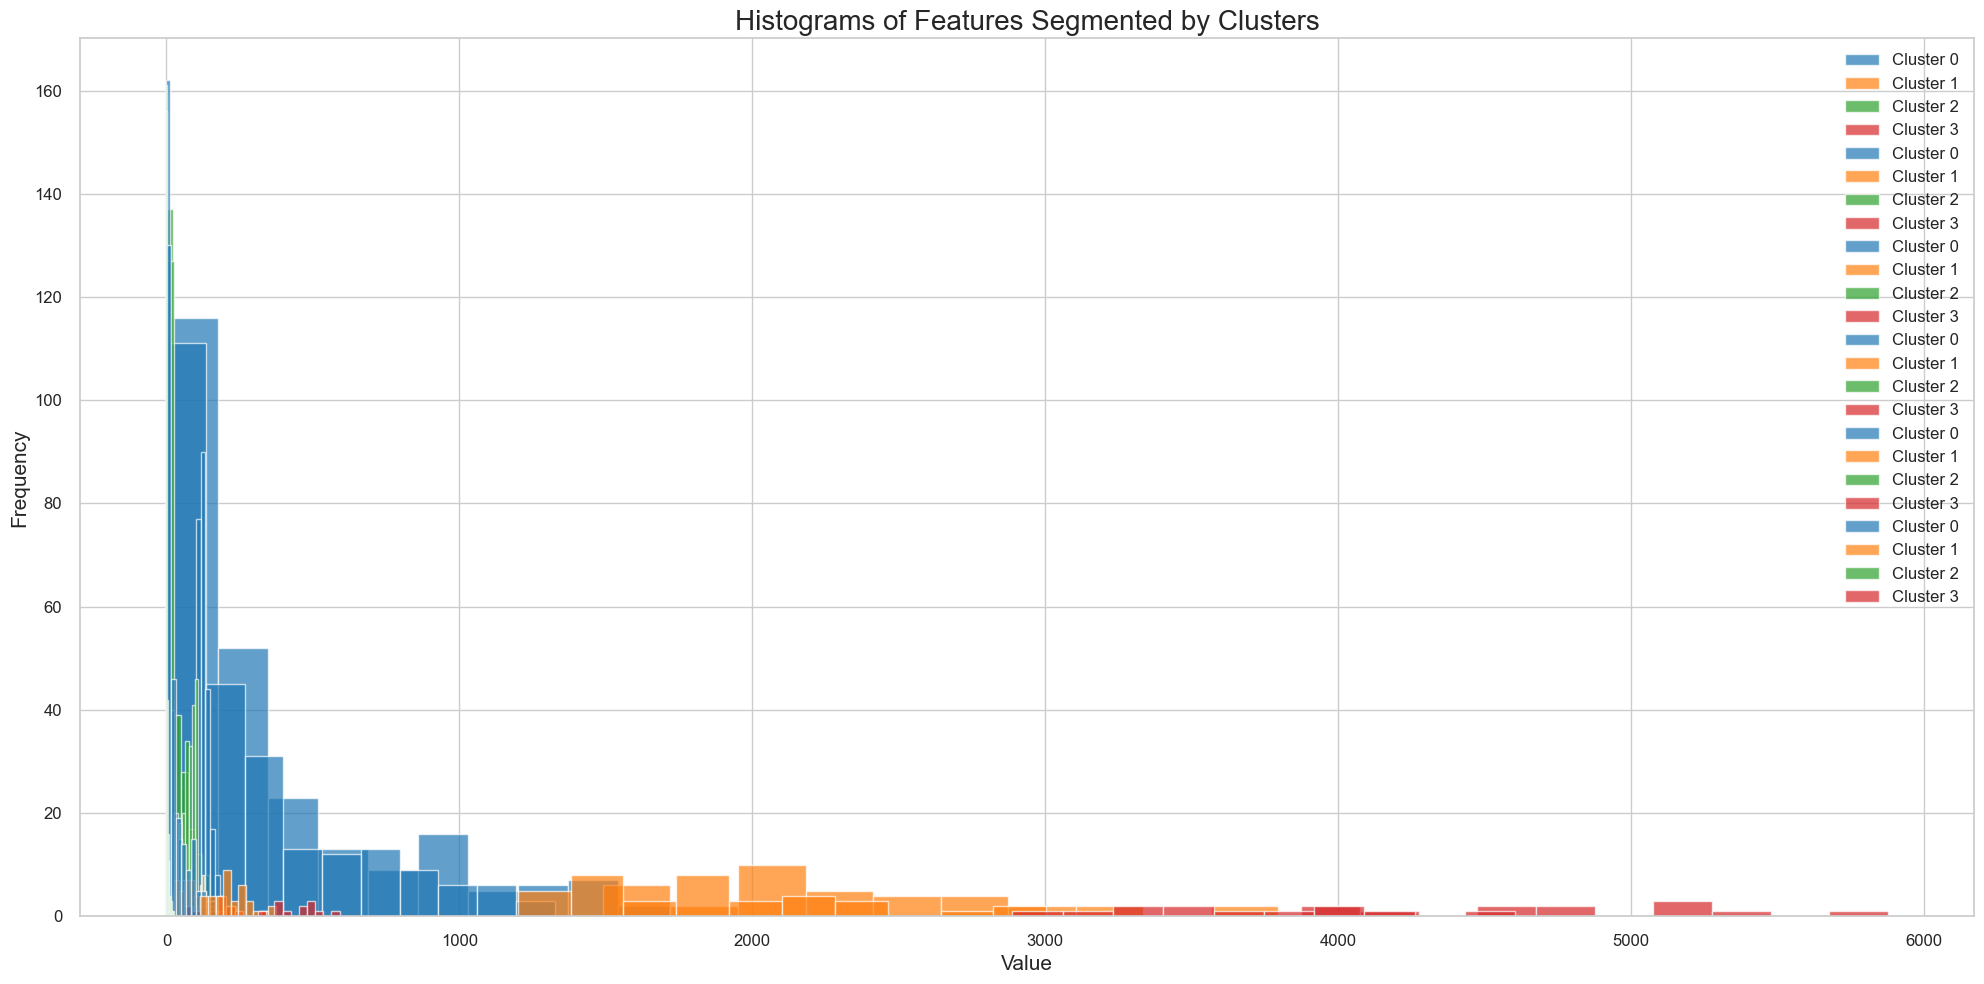

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
colors = sns.color_palette('tab10')

# Define the features and clusters
features = batsman_data_cleaned_hie.columns[1:-1]
clusters = batsman_data_cleaned_hie['cluster'].unique()
clusters.sort()

# Initialize the figure
plt.figure(figsize=(20, 10))

# Plot histograms for each feature segmented by clusters
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = batsman_data_cleaned_hie[batsman_data_cleaned_hie['cluster'] == cluster][feature]
        plt.hist(data, bins=10, color=colors[j], edgecolor='w', alpha=0.7, label=f'Cluster {cluster}')

# Add titles and labels
plt.title('Histograms of Features Segmented by Clusters', fontsize=20)
plt.xlabel('Value', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">11: DBSCAN</p>

In [63]:
batsman_data_scaled_DBSCAN = batsman_data_scaled.drop('cluster', axis=1).copy()
batsman_data_cleaned_DBSCAN.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,23,280,196,142.857143,15,16
1,A Chandila,2,4,7,57.142857,0,0
2,A Chopra,6,53,75,70.666667,0,7
3,A Choudhary,3,25,20,125.000000,1,1
4,A Dananjaya,1,4,5,80.000000,0,0


In [64]:
batsman_data_scaled_DBSCAN.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,0.010804,-0.180097,-0.228419,1.117357,-0.041612,-0.282778
1,A Chandila,-0.592359,-0.478838,-0.491787,-1.165316,-0.440646,-0.465622
2,A Chopra,-0.477471,-0.425801,-0.397030,-0.805161,-0.440646,-0.385628
3,A Choudhary,-0.563637,-0.456108,-0.473672,0.641800,-0.414044,-0.454194
4,A Dananjaya,-0.621081,-0.478838,-0.494574,-0.556603,-0.440646,-0.465622


In [65]:
X = batsman_data_scaled_DBSCAN.drop(['batsman'], axis=1)
X.head()

,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,0.010804,-0.180097,-0.228419,1.117357,-0.041612,-0.282778
1,-0.592359,-0.478838,-0.491787,-1.165316,-0.440646,-0.465622
2,-0.477471,-0.425801,-0.397030,-0.805161,-0.440646,-0.385628
3,-0.563637,-0.456108,-0.473672,0.641800,-0.414044,-0.454194
4,-0.621081,-0.478838,-0.494574,-0.556603,-0.440646,-0.465622


## 11.1: Finding Best Parameters

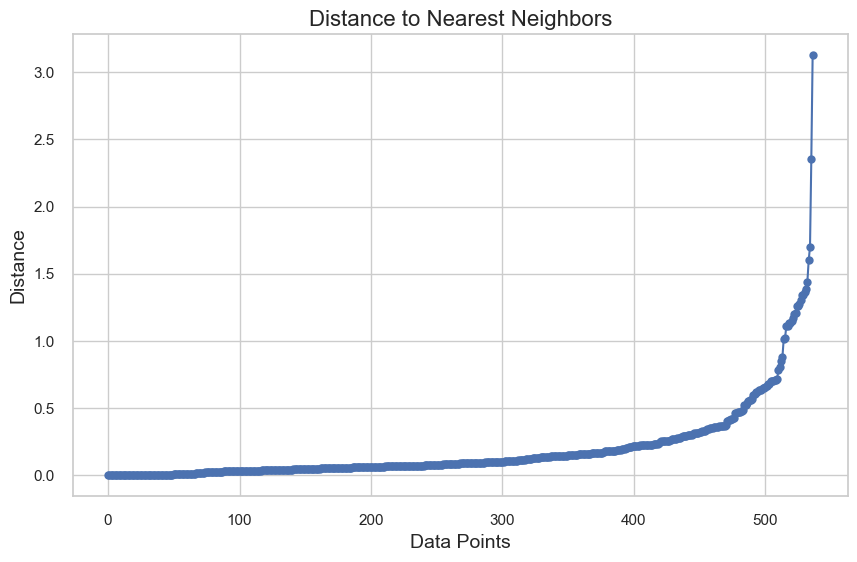

In [66]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Initialize NearestNeighbors model
neighbors = NearestNeighbors(n_neighbors=20)
# Fit the model to the data
neighbors_fit = neighbors.fit(X)
# Find distances to nearest neighbors
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(distances, marker='o', linestyle='-')
plt.title('Distance to Nearest Neighbors', fontsize=16)
plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.grid(True)
plt.show()


## 11.2: Clustering Model - DBSCAN

In [67]:
# import dbscan
from sklearn.cluster import DBSCAN
# eps=1.4 as suggested by our plot
db = DBSCAN(eps=1.4, min_samples=10).fit(X)

In [68]:
# lets get the labels out
labels = db.labels_
batsman_data_scaled_DBSCAN['cluster'] = labels
batsman_data_cleaned_DBSCAN['cluster'] = labels
batsman_data_scaled_DBSCAN['cluster'].unique()

array([ 0, -1], dtype=int64)

## 11.3: Evaluation Metrics

In [69]:
from tabulate import tabulate

# Filter the data
filtered_data = batsman_data_cleaned_DBSCAN[(batsman_data_cleaned_DBSCAN['total_runs'] > 2500) & (batsman_data_cleaned_DBSCAN['matches_played'] >= 100)]

# Identify the cluster(s) containing the filtered players
best_players_cluster = filtered_data['cluster'].unique()

# Initialize a list to store formatted data
output_data = []

# Analyze the characteristics of the players in the identified cluster(s)
for cluster in best_players_cluster:
    players_in_cluster = filtered_data[filtered_data['cluster'] == cluster]['batsman'].tolist()
    player_list = ', '.join(players_in_cluster)
    output_data.append([f"Cluster {cluster}", player_list])

# Print the formatted output in a box
print(tabulate(output_data, headers=["Cluster", "Players"], tablefmt='fancy_grid'))

╒════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Cluster    │ Players                                                                                                                                                                                                             │
╞════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Cluster -1 │ AB de Villiers, AM Rahane, AT Rayudu, CH Gayle, DA Warner, G Gambhir, KA Pollard, KD Karthik, MK Pandey, MS Dhoni, PA Patel, RG Sharma, RV Uthappa, S Dhawan, SK Raina, SR Watson, V Kohli, YK Pathan, Yuvraj Singh │
├────────────┼──────────────────────────────────────────────────────────────────────

In [70]:
# Compute number of batsman
num_observations = len(batsman_data_scaled_DBSCAN.iloc[:,1:])

# Separate the features and the cluster labels
X = batsman_data_scaled_DBSCAN.drop(['cluster','batsman'], axis=1)
clusters = batsman_data_scaled_DBSCAN['cluster']

# Compute the metrics
dbscan_silhouette_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)


# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", dbscan_silhouette_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='fancy_grid'))

╒═════════════════════════╤════════════╕
│ Metric                  │      Value │
╞═════════════════════════╪════════════╡
│ Number of Observations  │ 537        │
├─────────────────────────┼────────────┤
│ Silhouette Score        │   0.768603 │
├─────────────────────────┼────────────┤
│ Calinski Harabasz Score │ 503.992    │
├─────────────────────────┼────────────┤
│ Davies Bouldin Score    │   0.422887 │
╘═════════════════════════╧════════════╛


<div style="background-color: #FFFAFA; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">

<b>Inference</b>:<br>
<b>Using Hierarchical Clustering</b>:<br>
<li>The <b>Silhouette Score<b> of approximately <b>0.768<b> highly to 1, still indicates a high amount of separation between the clusters. It suggest       that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, i             indicating more distinct and well-separated clusters.</li>
<li>The <b>Calinski Harabasz Score<b> is <b>503.991<b> which is moderately high, indicating that the clusters are somewhat well-defined. A higher score     in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the         data </li>
<li>The <b>Davies Bouldin Score<b> of <b>0.422<b> is a reasonable score, indicating a fair level of similarity between each cluster and its most   s        similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent             separation between the clusters.</li>

## 11.4: Visualization

## 11.4.1: Radar Chart

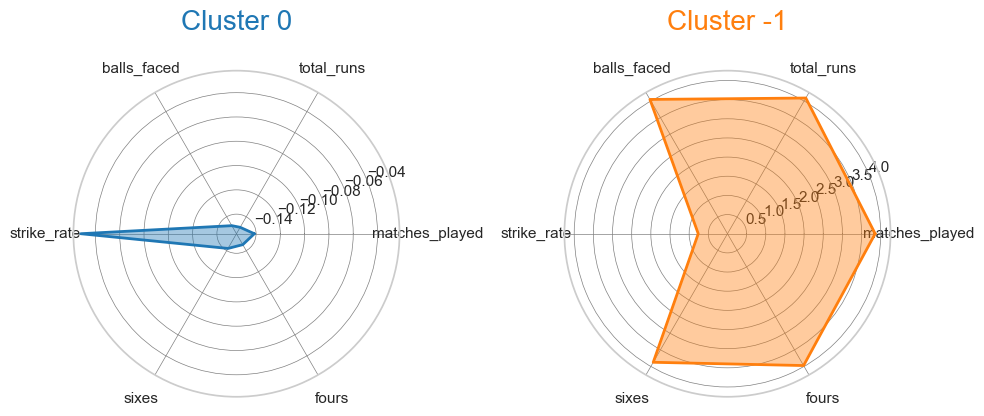

In [71]:
# Setting 'batsman' column as index and assigning it to a new dataframe
df_batsman = batsman_data_cleaned_DBSCAN.set_index('batsman')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_batsman_standardized = scaler.fit_transform(df_batsman.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_batsman_standardized = pd.DataFrame(df_batsman_standardized, columns=df_batsman.columns[:-1], index=df_batsman.index)
df_batsman_standardized['cluster'] = df_batsman['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_batsman_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)
    
# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True), nrows=1, ncols=2)

# Create radar chart for each cluster
for i, color in enumerate(['tab:blue', 'tab:orange']): # Adjust colors as needed
    cluster_label = i if i == 0 else -1  # Map cluster index to cluster label
    data = cluster_centroids.loc[cluster_label].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, cluster_label)

    # Add input data
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

# Add titles
ax[0].set_title('Cluster 0', color='tab:blue', size=20, y=1.1)
ax[1].set_title('Cluster -1', color='tab:orange', size=20, y=1.1)

# Display the plot
plt.tight_layout()
plt.show()

## 11.4.2: Histogram Chart Approach

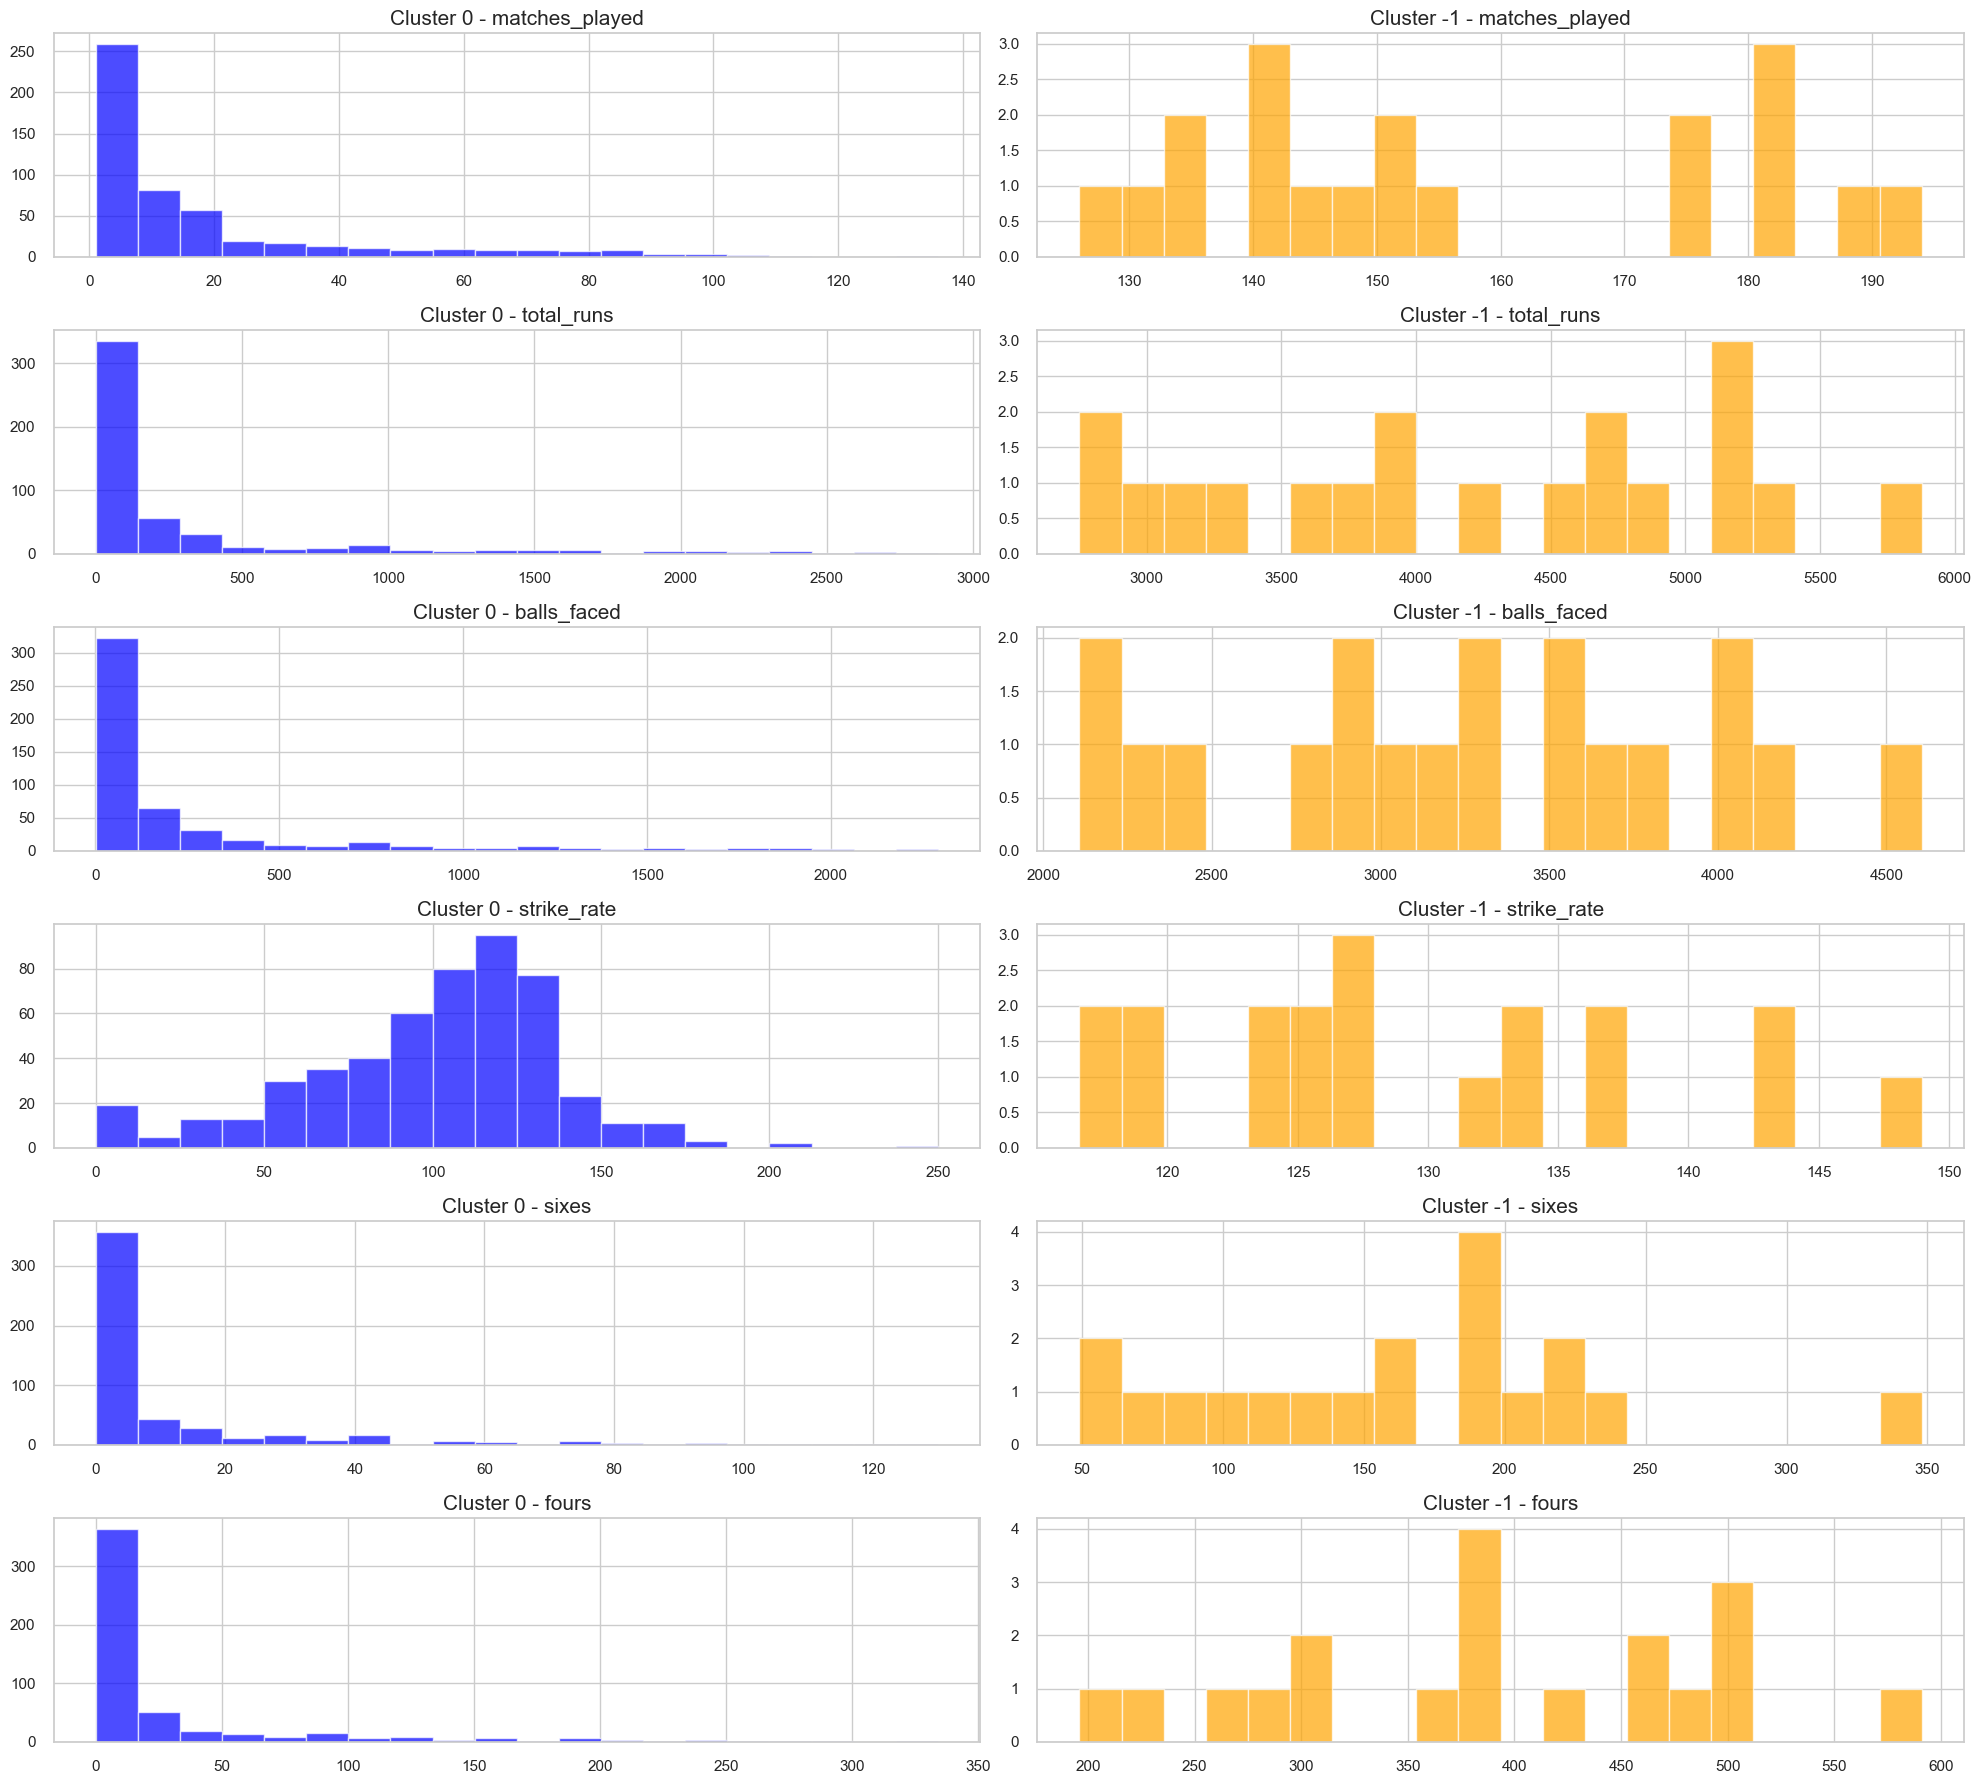

In [72]:
colors = ['blue', 'orange']

# Define features and clusters
features = batsman_data_cleaned_DBSCAN.columns[1:-1]
clusters = [0, -1]

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = batsman_data_cleaned_DBSCAN[batsman_data_cleaned_DBSCAN['cluster'] == cluster][feature]
        if n_rows > 1:
            ax = axes[i, j]
        else:
            ax = axes[j]
        ax.hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        ax.set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        ax.set_xlabel('')
        ax.set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

# <p id="1" style="justify-content: center; align-items: center; background-color: #F0F8FF; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">12: Conclusion</p>

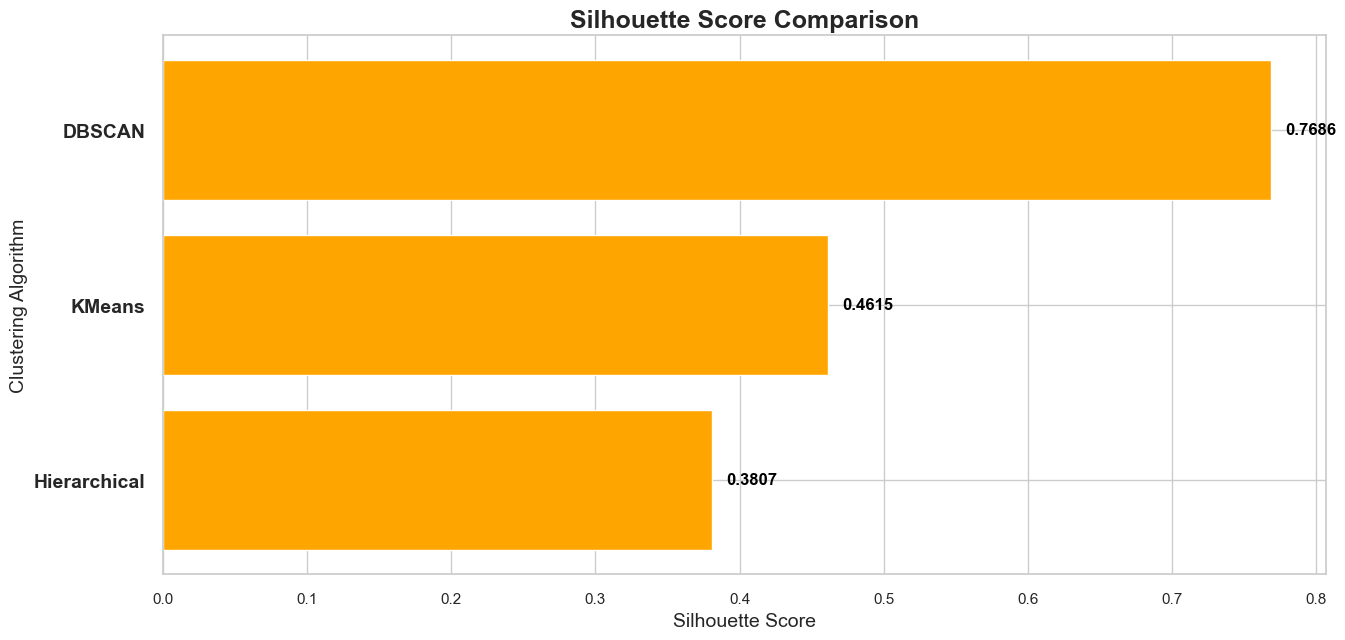

In [73]:
# Define the silhouette scores obtained from different clustering algorithms
silhouette_scores = {
    "KMeans": kmeans_silhouette_score,
    "Hierarchical": hierarchical_silhouette_score,
    "DBSCAN": dbscan_silhouette_score
}

# Convert silhouette scores to DataFrame for easier plotting
silhouette_df = pd.DataFrame.from_dict(silhouette_scores, orient='index', columns=['Silhouette Score'])

# Sort silhouette scores for better visualization
silhouette_df.sort_values(by='Silhouette Score', ascending=False, inplace=True)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 7))
bars = ax.barh(range(len(silhouette_df)), silhouette_df['Silhouette Score'], color='orange')

# Annotate the values outside the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.01, i, f'{width:.4f}', ha='left', va='center', fontweight='bold', color='black')

# Set y-axis labels and make them bold
ax.set_yticks(range(len(silhouette_df)))
ax.set_yticklabels(silhouette_df.index, fontsize=14, fontweight='bold')
ax.set_ylabel('Clustering Algorithm', fontsize=14)
# Set x-axis label
ax.set_xlabel('Silhouette Score', fontsize=14)

# Add title
plt.title("Silhouette Score Comparison", fontweight='bold', fontsize=18)

# Invert y-axis for better readability
plt.gca().invert_yaxis()

plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Batsman Clustering Performance</title>
  <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css" integrity="sha384-ZenhBWKWvBrQzIUhFJvWYSLpC+qwL4WBqwYoiyDkfnlfkz8H3zIWzQMKGn9iyzFK" crossorigin="anonymous">
</head>
<body>
  <h1>Batsman Clustering Performance</h1>
  <p>Among all the tested clustering algorithms, DBSCAN clustering had the best performance.</p>

  <div class="container">
    <table class="table table-striped">
      <thead>
        <tr>
          <th scope="col">Metric</th>
          <th scope="col">Score</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td>Silhouette Score</td>
          <td class="table-success">0.7686</td>  </tr>
        <tr>
          <td>Calinski Harabasz Score</td>
          <td>503.991</td>
        </tr>
        <tr>
          <td>Davies Bouldin Score</td>
          <td>0.422</td>
        </tr>
      </tbody>
    </table>
  </div>

  </body>
</html>

In [74]:
from tabulate import tabulate

# Filter the data to include only players with at least 100 matches and more than 2500 runs
filtered_data = batsman_data_cleaned_DBSCAN[(batsman_data_cleaned_DBSCAN['total_runs'] > 2500) & (batsman_data_cleaned_DBSCAN['matches_played'] >= 100)]

# Selecting desired columns
filtered_data_with_clusters = filtered_data[batsman_data_cleaned_DBSCAN.columns]

# Sort the filtered data by total runs in descending order
sorted_filtered_data = filtered_data_with_clusters.sort_values('total_runs', ascending=False).reset_index(drop=True)

# Display the data in a box format
print(tabulate(sorted_filtered_data, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════════╤══════════════════╤══════════════╤═══════════════╤═══════════════╤═════════╤═════════╤═══════════╕
│    │ batsman        │   matches_played │   total_runs │   balls_faced │   strike_rate │   sixes │   fours │   cluster │
╞════╪════════════════╪══════════════════╪══════════════╪═══════════════╪═══════════════╪═════════╪═════════╪═══════════╡
│  0 │ V Kohli        │              183 │         5877 │          4605 │       127.622 │     202 │     504 │        -1 │
├────┼────────────────┼──────────────────┼──────────────┼───────────────┼───────────────┼─────────┼─────────┼───────────┤
│  1 │ SK Raina       │              189 │         5368 │          4041 │       132.838 │     194 │     493 │        -1 │
├────┼────────────────┼──────────────────┼──────────────┼───────────────┼───────────────┼─────────┼─────────┼───────────┤
│  2 │ DA Warner      │              141 │         5235 │          3809 │       137.438 │     193 │     509 │        -1 │
├────┼────────────────┼─

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Batsman Cluster Insights</title>
</head>
<body>
  <h2>Batsman Cluster Insights</h2>

  <div class="card">
    <div class="card-header" id="cluster-1-header">
      <h5 class="mb-0">
        <button class="btn btn-link" type="button" data-bs-toggle="collapse" data-bs-target="#cluster-1-content" aria-expanded="true" aria-controls="cluster-1-content">
          Cluster -1
        </button>
      </h5>
    </div>
    <div id="cluster-1-content" class="collapse show" aria-labelledby="cluster-1-header" data-bs-parent=".card">
      <div class="card-body">
        <p>This cluster consists of batsmen who have played a significant number of matches with high total runs scored.</p>
        <ul>
          <li>High number of matches played and total runs scored.</li>
          <li>Considerable number of balls faced, indicating involvement and longevity in innings.</li>
          <li>Strike rates vary but generally fall within a competitive range.</li>
          <li>Notable presence of boundary hitters with high sixes and fours.</li>
          <li>Examples: Virat Kohli, Suresh Raina, David Warner, Rohit Sharma, AB de Villiers (prolific run-scorers, consistent performers across seasons, key players).</li>
        </ul>
      </div>
    </div>
  </div>

  <div class="card">
    <div class="card-header" id="cluster-0-header">
      <h5 class="mb-0">
        <button class="btn btn-link" type="button" data-bs-toggle="collapse" data-bs-target="#cluster-0-content" aria-expanded="false" aria-controls="cluster-0-content">
          Cluster 0
        </button>
      </h5>
    </div>
    <div id="cluster-0-content" class="collapse" aria-labelledby="cluster-0-header" data-bs-parent=".card">
      <div class="card-body">
        <p>This cluster consists of batsmen with relatively fewer matches played and lower total runs compared to Cluster -1.</p>
        <ul>
          <li>Fewer matches played and lower total runs compared to Cluster -1.</li>
          <li>Strike rates vary, with some batsmen having comparable or even higher strike rates than those in Cluster -1.</li>
          <li>Mix of experienced players (Brendon McCullum, Virender Sehwag) and younger talents (Sanju Samson, Murali Vijay).</li>
          <li>May have had periods of explosive performances but may not have sustained consistency or played as many matches as those in Cluster -1.</li>
        </ul>
     </div>
    </div>
  </div>

  </body>
</html>


In [75]:
file_path = "ipl_top_batsmen_stats 2008-2020.csv"

# Save the DataFrame to CSV
filtered_data_with_clusters.to_csv(file_path, index=False)

print("DataFrame successfully saved to csv file:", file_path)

DataFrame successfully saved to csv file: ipl_top_batsmen_stats 2008-2020.csv
